___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## 1. Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
!pip install scikit-plot
!pip install xgboost==0.90

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_auc_score
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall
from pandas.core.arrays.categorical import CategoricalAccessor
from sklearn.compose import make_column_transformer

#Classifires
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# !pip install -U imbalanced-learn

# 2. Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1") # 'utf-8' can't decode
df_female = pd.read_csv(" https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding="utf-8")

In [ ]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [ ]:
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

# 3. Explore and Visualize Data

In [ ]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [ ]:
df_male.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df_male.describe()

subjectid  abdominalextensiondepthsitting  acromialheight  \
count   4082.000                        4082.000        4082.000   
mean   20003.371                         254.651        1440.737   
std     6568.435                          37.327          63.287   
min    10027.000                         163.000        1194.000   
25%    14270.250                         227.000        1398.000   
50%    17236.500                         251.000        1439.000   
75%    27315.750                         279.000        1481.000   
max    29452.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               4082.000            4082.000      4082.000   
mean                 335.244             229.344      1329.082   
std                   17.483              14.649        59.516   
min                  270.000             156.000      1106.000   
25%                  324.000             219.250      1289.000   
50%                  335.000             228.000      1328.000   
75%                  346.000             239.000      1367.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 4082.000          4082.000           4082.000   
mean                   252.017           200.935            415.676   
std                     12.936            10.471             19.162   
min                    186.000           156.000            337.000   
25%                    243.000           194.000            403.000   
50%                    252.000           201.000            415.000   
75%                    261.000           208.000            428.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   4082.000          4082.000          4082.000   
mean                     358.136           275.433           510.425   
std                       34.618            17.514            32.506   
min                      246.000           219.000           374.000   
25%                      335.000           263.000           489.000   
50%                      357.000           275.000           509.000   
75%                      380.000           288.000           531.000   
max                      490.000           334.000           637.000   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count            4082.000          4082.000                   4082.000   
mean               74.785           331.651                    315.713   
std                 4.118            14.038                     16.648   
min                59.000           281.000                    259.000   
25%                72.000           322.000                    305.000   
50%                75.000           332.000                    315.000   
75%                77.000           341.000                    326.000   
max                91.000           385.000                    390.000   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count            4082.000              4082.000      4082.000       4082.000   
mean              142.622              1019.519       245.849        887.867   
std                 6.219                76.681        26.459         49.919   
min               120.000               737.000       171.000        716.000   
25%               138.000               967.000       227.000        853.000   
50%               143.000              1017.000       246.000        885.000   
75%               147.000              1068.000       263.000        920.000   
max               174.000              1305.000       343.000       1080.000   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count           4082.000                4082.000   

In [ ]:
df_female.describe()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
count   1986.000                        1986.000        1986.000   
mean   22306.606                         229.651        1335.095   
std    20904.730                          31.465          58.080   
min    10037.000                         155.000        1115.000   
25%    17667.000                         207.000        1298.000   
50%    22096.500                         227.000        1332.000   
75%    26089.750                         249.000        1374.000   
max   920103.000                         358.000        1536.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               1986.000            1986.000      1986.000   
mean                 311.198             215.740      1239.030   
std                   17.165              14.892        55.802   
min                  249.000             170.000      1038.000   
25%                  300.000             205.000      1202.000   
50%                  311.000             215.000      1236.000   
75%                  323.000             225.000      1277.000   
max                  371.000             275.000      1419.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 1986.000          1986.000           1986.000   
mean                   228.110           182.051            365.349   
std                     11.771             9.642             18.299   
min                    194.000           151.000            283.000   
25%                    220.000           175.000            353.000   
50%                    227.000           182.000            365.000   
75%                    236.000           188.000            378.000   
max                    270.000           216.000            422.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   1986.000          1986.000          1986.000   
mean                     305.579           273.300           450.324   
std                       30.757            22.260            28.687   
min                      216.000           197.000           357.000   
25%                      285.000           258.000           430.000   
50%                      304.000           273.000           450.000   
75%                      324.000           287.000           469.000   
max                      435.000           362.000           558.000   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count            1986.000          1986.000                   1986.000   
mean               67.048           311.013                    287.979   
std                 3.486            14.162                     15.299   
min                55.000           267.000                    245.000   
25%                65.000           302.000                    277.000   
50%                67.000           311.000                    287.500   
75%                69.000           321.000                    297.000   
max                83.000           370.000                    378.000   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count            1986.000              1986.000      1986.000       1986.000   
mean              133.765              1021.248       232.927        833.742   
std                 5.563                75.895        24.328         45.730   
min               116.000               798.000       168.000        656.000   
25%               130.000               969.000       216.000        804.000   
50%               134.000              1018.500       231.000        831.000   
75%               137.000              1069.000       248.000        864.000   
max               152.000              1341.000       349.000        995.000   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count           1986.000                1986.000   

In [ ]:
df_male.duplicated().sum()

0

In [ ]:
df_female.duplicated().sum()

0

In [ ]:
df_male.isnull().sum()
#Ethnicity = 3180 nulls

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [ ]:
df_female.isnull().sum()
#Ethnicity = 1467 nulls

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [ ]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [ ]:
df_male.columns.difference(df_female.columns)

Index(['subjectid'], dtype='object')

In [ ]:
df_male.rename(columns={'subjectid': 'SubjectId'}, inplace=True)

In [ ]:
df_female.columns.equals(df_male.columns)

True

In [ ]:
# Concatenate vertically (along rows)
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [ ]:
Gender = df['Gender']
Gender.value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

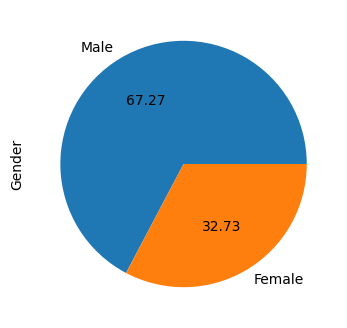

In [ ]:
Gender.value_counts().plot.pie(autopct='%.2f')

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
df.describe().T

count      mean       std       min  \
SubjectId                      6068.000 20757.198 13159.391 10027.000   
abdominalextensiondepthsitting 6068.000   246.469    37.400   155.000   
acromialheight                 6068.000  1406.161    79.091  1115.000   
acromionradialelength          6068.000   327.374    20.720   249.000   
anklecircumference             6068.000   224.891    16.052   156.000   
axillaheight                   6068.000  1299.609    72.022  1038.000   
balloffootcircumference        6068.000   244.193    16.845   186.000   
balloffootlength               6068.000   194.755    13.516   151.000   
biacromialbreadth              6068.000   399.204    30.237   283.000   
bicepscircumferenceflexed      6068.000   340.934    41.520   216.000   
bicristalbreadth               6068.000   274.735    19.221   197.000   
bideltoidbreadth               6068.000   490.754    42.136   357.000   
bimalleolarbreadth             6068.000    72.253     5.345    55.000   
bitragionchinarc               6068.000   324.897    17.088   267.000   
bitragionsubmandibulararc      6068.000   306.636    20.794   245.000   
bizygomaticbreadth             6068.000   139.723     7.308   116.000   
buttockcircumference           6068.000  1020.085    76.423   737.000   
buttockdepth                   6068.000   241.620    26.483   168.000   
buttockheight                  6068.000   870.152    54.823   656.000   
buttockkneelength              6068.000   608.999    33.793   466.000   
buttockpopliteallength         6068.000   497.098    29.082   367.000   
calfcircumference              6068.000   386.041    30.647   266.000   
cervicaleheight                6068.000  1477.490    84.324  1184.000   
chestbreadth                   6068.000   282.859    20.659   213.000   
chestcircumference             6068.000  1022.099   100.672   695.000   
chestdepth                     6068.000   251.738    26.778   170.000   
chestheight                    6068.000  1252.013    79.584   984.000   
crotchheight                   6068.000   825.110    54.748   610.000   
crotchlengthomphalion          6068.000   621.852    45.333   473.000   
crotchlengthposterioromphalion 6068.000   351.316    29.945   243.000   
earbreadth                     6068.000    35.132     3.231    25.000   
earlength                      6068.000    62.626     4.876    46.000   
earprotrusion                  6068.000    22.263     3.173    13.000   
elbowrestheight                6068.000   240.911    28.509   138.000   
eyeheightsitting               6068.000   785.914    41.866   654.000   
footbreadthhorizontal          6068.000    98.865     6.658    77.000   
footlength                     6068.000   263.034    17.391   198.000   
forearmcenterofgriplength      6068.000   338.767    23.245   258.000   
forearmcircumferenceflexed     6068.000   295.011    30.050   200.000   
forearmforearmbreadth          6068.000   552.076    62.368   376.000   
forearmhandlength              6068.000   467.007    30.035   342.000   
functionalleglength            6068.000  1102.049    68.546   835.000   
handbreadth                    6068.000    84.953     6.347    67.000   
handcircumference              6068.000   203.861    15.551   152.000   
handlength                     6068.000   189.287    11.506   145.000   
headbreadth                    6068.000   152.183     6.236   131.000   
headcircumference              6068.000   570.035    18.291   500.000   
headlength                     6068.000   196.335     8.485   168.000   
heelanklecircumference         6068.000   332.623    22.461   258.000   
heelbreadth                    6068.000    70.757     5.933    48.000   
hipbreadth                     6068.000   348.385    25.298   264.000   
hipbreadthsitting              6068.000   385.733    32.400   280.000   
iliocristaleheight             6068.000  1040.059    59.867   816.000   
interpupillarybreadth          6068.000   632.602    36.509   510.000   
interscyei         

In [ ]:
df.corr()["DODRace"].sort_values(ascending=False)

DODRace                           1.000
interpupillarybreadth             0.140
bizygomaticbreadth                0.101
heelbreadth                       0.077
headbreadth                       0.056
bitragionchinarc                  0.048
SubjectId                         0.022
SubjectNumericRace                0.018
Age                               0.005
bitragionsubmandibulararc        -0.020
tragiontopofhead                 -0.021
earprotrusion                    -0.029
lowerthighcircumference          -0.038
thighcircumference               -0.043
earlength                        -0.043
mentonsellionlength              -0.044
footbreadthhorizontal            -0.053
headcircumference                -0.054
thighclearance                   -0.060
buttockdepth                     -0.064
hipbreadthsitting                -0.065
bicepscircumferenceflexed        -0.067
palmlength                       -0.074
chestdepth                       -0.078
shoulderlength                   -0.079


In [ ]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [ ]:
drop_DODRace= df.DODRace.value_counts()[df.DODRace.value_counts() < 500].index
drop_DODRace

# We list the DODRace with 500 or less observations.
# We will drop the observations of the DODRace in this list from our data.

Int64Index([4, 6, 5, 8], dtype='int64')

In [ ]:
for i in drop_DODRace:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(5769, 108)

In [ ]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [ ]:
drop_huge_nulls = []

for col in df:
    if(df[col].isnull().sum()>(df.shape[0]//3)):
        drop_huge_nulls.append(col)
drop_huge_nulls
#drop columns with null values greater than (5769/3 = 1923) => more than 30% of the data is null

['Ethnicity']

In [ ]:
df.drop(drop_huge_nulls, axis = 1, inplace = True)
df

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
5764      29501                             285            1392   
5765      29502                             262            1324   
5766      29503                             260            1334   
5767      29511                             205            1293   
5768     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
5764                    335                 223          1297   
5765                    301                 202          1204   
5766                    318                 213          1259   
5767                    302                 199          1207   
5768                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
5764                      252               196                368   
5765                      236               181                378   
5766                      234               183                363   
5767                      213               163                376   
5768                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
5764                        299               312               477   
5765                        294               287               468   
5766                        332               299               460   
5767                        276               280               426   
5768                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
5764                  72               306                        282   
5765                  66               309                        311   
5766                  70               317                        311

In [ ]:
df.SubjectNumericRace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [ ]:
df[["DODRace","SubjectNumericRace"]]

DODRace  SubjectNumericRace
0           1                   1
1           1                   1
2           2                   2
3           1                   1
4           2                   2
...       ...                 ...
5764        3                   3
5765        3                   3
5766        2                   2
5767        3                   3
5768        3                   3

[5769 rows x 2 columns]

In [ ]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)
df
# SubjectNumericRace and DODRace columns have the same information about a subject’s self-reported race, so I drop it.

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
5764      29501                             285            1392   
5765      29502                             262            1324   
5766      29503                             260            1334   
5767      29511                             205            1293   
5768     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
5764                    335                 223          1297   
5765                    301                 202          1204   
5766                    318                 213          1259   
5767                    302                 199          1207   
5768                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
5764                      252               196                368   
5765                      236               181                378   
5766                      234               183                363   
5767                      213               163                376   
5768                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
5764                        299               312               477   
5765                        294               287               468   
5766                        332               299               460   
5767                        276               280               426   
5768                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
5764                  72               306                        282   
5765                  66               309                        311   
5766                  70               317                        311

In [ ]:
df[['Weightlbs','weightkg']]

Weightlbs  weightkg
0           180       815
1           160       726
2           205       929
3           175       794
4           213       946
...         ...       ...
5764        180       832
5765        150       717
5766        168       762
5767        133       632
5768        132       610

[5769 rows x 2 columns]

In [ ]:
df.drop("Weightlbs", axis = 1, inplace = True)
df
#Weightlbs and weightkg columns have the same information about weight, so I drop Weightlbs.

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
5764      29501                             285            1392   
5765      29502                             262            1324   
5766      29503                             260            1334   
5767      29511                             205            1293   
5768     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
5764                    335                 223          1297   
5765                    301                 202          1204   
5766                    318                 213          1259   
5767                    302                 199          1207   
5768                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
5764                      252               196                368   
5765                      236               181                378   
5766                      234               183                363   
5767                      213               163                376   
5768                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
5764                        299               312               477   
5765                        294               287               468   
5766                        332               299               460   
5767                        276               280               426   
5768                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
5764                  72               306                        282   
5765                  66               309                        311   
5766                  70               317                        311

In [ ]:
df_object = df.select_dtypes(include ="object").head()
df_object

# select_dtypes(include ="object") to filter only object type features

Gender       Date Installation     Component                  Branch  \
0   Male   4-Oct-10    Fort Hood  Regular Army             Combat Arms   
1   Male   4-Oct-10    Fort Hood  Regular Army          Combat Support   
2   Male   4-Oct-10    Fort Hood  Regular Army          Combat Support   
3   Male  12-Oct-10    Fort Hood  Regular Army  Combat Service Support   
4   Male  12-Oct-10    Fort Hood  Regular Army  Combat Service Support   

  PrimaryMOS SubjectsBirthLocation WritingPreference  
0        19D          North Dakota        Right hand  
1        68W              New York         Left hand  
2        68W              New York         Left hand  
3        88M             Wisconsin        Right hand  
4        92G        North Carolina        Right hand

In [ ]:
for col in df_object:
    print(f"{col:<25}: {df[col].nunique():<5}unique values")

Gender                   : 2    unique values
Date                     : 253  unique values
Installation             : 12   unique values
Component                : 3    unique values
Branch                   : 3    unique values
PrimaryMOS               : 281  unique values
SubjectsBirthLocation    : 136  unique values
WritingPreference        : 3    unique values


In [ ]:
for col in df_object:
    print(f"{col:<25}:", df[col].unique())

Gender                   : ['Male' 'Female']
Date                     : ['4-Oct-10' '12-Oct-10' '6-Oct-10' '7-Oct-10' '13-Oct-10' '14-Oct-10'
 '15-Oct-10' '18-Oct-10' '19-Oct-10' '20-Oct-10' '21-Oct-10' '22-Oct-10'
 '25-Oct-10' '26-Oct-10' '27-Oct-10' '28-Oct-10' '29-Oct-10' '2-Nov-10'
 '4-Nov-10' '17-Nov-10' '16-Nov-10' '18-Nov-10' '19-Nov-10' '22-Nov-10'
 '23-Nov-10' '29-Nov-10' '30-Nov-10' '1-Dec-10' '2-Dec-10' '3-Dec-10'
 '6-Dec-10' '7-Dec-10' '10-Dec-10' '8-Dec-10' '13-Dec-10' '14-Dec-10'
 '5-Jan-11' '7-Jan-11' '10-Jan-11' '11-Jan-11' '12-Jan-11' '13-Jan-11'
 '19-Jan-11' '18-Jan-11' '20-Jan-11' '21-Jan-11' '27-Jan-11' '28-Jan-11'
 '30-Jan-11' '31-Jan-11' '7-Feb-11' '8-Feb-11' '9-Feb-11' '11-Feb-11'
 '15-Feb-11' '16-Feb-11' '17-Feb-11' '22-Feb-11' '24-Feb-11' '25-Feb-11'
 '9-Mar-11' '11-Mar-11' '14-Mar-11' '15-Mar-11' '16-Mar-11' '17-Mar-11'
 '18-Mar-11' '22-Mar-11' '21-Mar-11' '24-Mar-11' '25-Mar-11' '26-Mar-11'
 '29-Mar-11' '30-Mar-11' '31-Mar-11' '8-Apr-11' '11-Apr-11' '12-Apr-1

<Axes: ylabel='Installation,DODRace'>

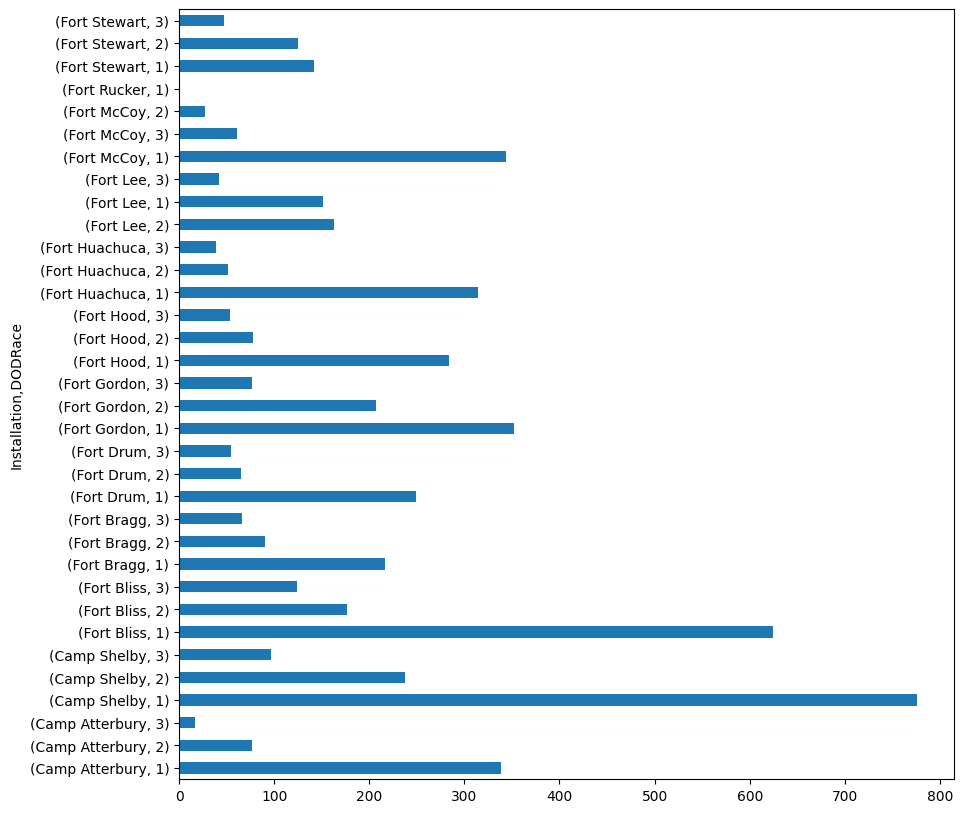

In [ ]:
plt.figure(figsize=(10,10))
df.groupby(["Installation"])["DODRace"].value_counts().plot(kind="barh")

<Axes: ylabel='Component,DODRace'>

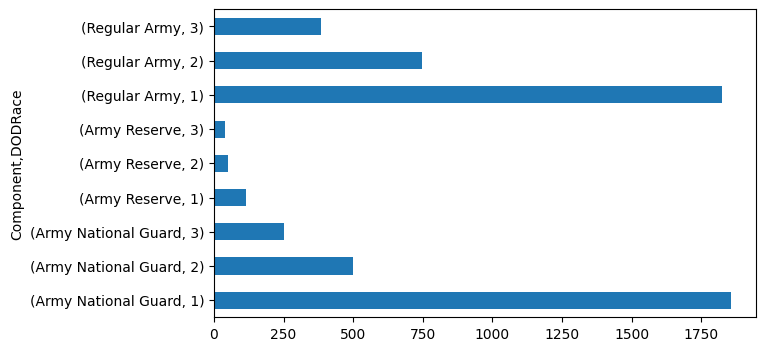

In [ ]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")

In [ ]:
df.groupby(["Branch"])["DODRace"].value_counts(normalize=True)

Branch                  DODRace
Combat Arms             1         0.760
                        3         0.125
                        2         0.115
Combat Service Support  1         0.633
                        2         0.247
                        3         0.121
Combat Support          1         0.593
                        2         0.306
                        3         0.101
Name: DODRace, dtype: float64

In [ ]:
df.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          623
                                             2           79
                                             3           74
                     Combat Service Support  1          917
                                             2          312
                                             3          142
                     Combat Support          1          315
                                             2          108
                                             3           37
Army Reserve         Combat Arms             1            5
                                             3            1
                     Combat Service Support  1           82
                                             3           30
                                             2           24
                     Combat Support          2           28
                                             1 

In [ ]:
drop_cols = ["SubjectId","Date", "Installation", "Component", "Branch", "PrimaryMOS", "Heightin" ]
df.drop(columns=drop_cols, axis=1, inplace=True)

# Dropped because it isn't related to race (SubjectId, Date, Installation, Component, Branch, PrimaryMOS, Heightin)

In [ ]:
df["Gender"] =df["Gender"].map({"Male":0,"Female":1})
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
5764    1
5765    1
5766    1
5767    1
5768    1
Name: Gender, Length: 5769, dtype: int64

In [ ]:
df.WritingPreference.value_counts()

Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: WritingPreference, dtype: int64

In [ ]:
df["WritingPreference"] =df["WritingPreference"].map({"Right hand":0,"Left hand":1, "Either hand (No preference)":2})
df["WritingPreference"]

0       0
1       1
2       1
3       0
4       0
       ..
5764    0
5765    0
5766    0
5767    0
5768    0
Name: WritingPreference, Length: 5769, dtype: int64

In [ ]:
df.shape

(5769, 98)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   
1               257               479                  67               344   
2               261               544                  75               345   
3               262               518                  73               328   
4               263               524                  80               340   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   
1                        320                 135                   944   
2                        330                 135                  1054   
3                        309                 143                   991   
4                        310                 138                  1029   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   
1           232            870                584                     468   
2           258            901                623                     506   
3           242            821                560                     437   
4           275           1080                706                     567   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   
1                357             1471           269                1021   
2                412             1501           288                1120   
3                395             1423           296                1114   
4                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   
1         253         1244           851                    615   
2         267         1288           854                    636   
3         262         1205           769                    590   
4         232         1452          1014                    682   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   
1                             376          33         62             18   
2                             359          40         61             23   
3                             341          39         66             25   
4                             382          32         56             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizonta

<Axes: ylabel='DODRace'>

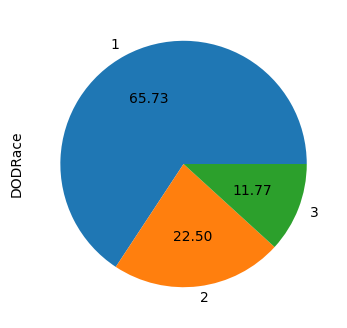

In [ ]:
df.DODRace.value_counts().plot.pie(autopct='%.2f')

[Text(0, 0, '3792'), Text(0, 0, '1298'), Text(0, 0, '679')]

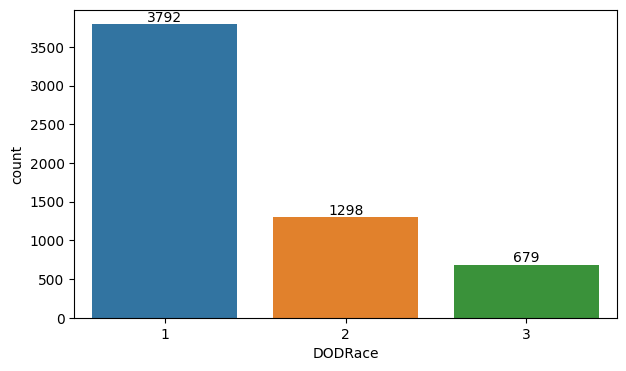

In [ ]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0])

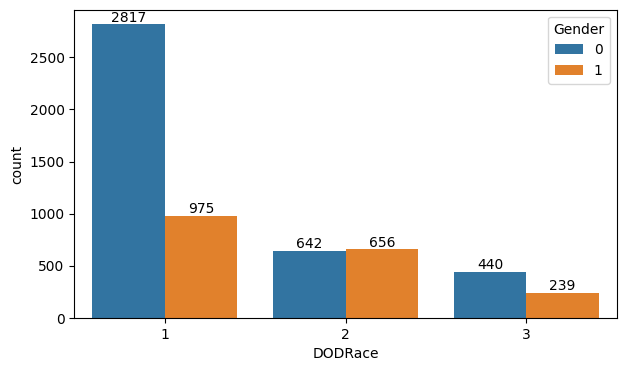

In [ ]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# distribution by gender

<Axes: xlabel='DODRace', ylabel='Count'>

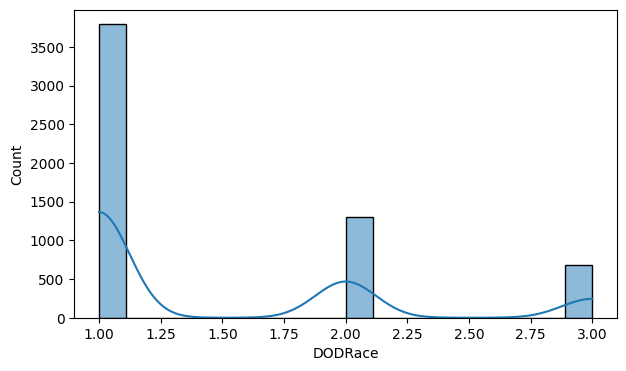

In [ ]:
sns.histplot(df.DODRace,kde = True)

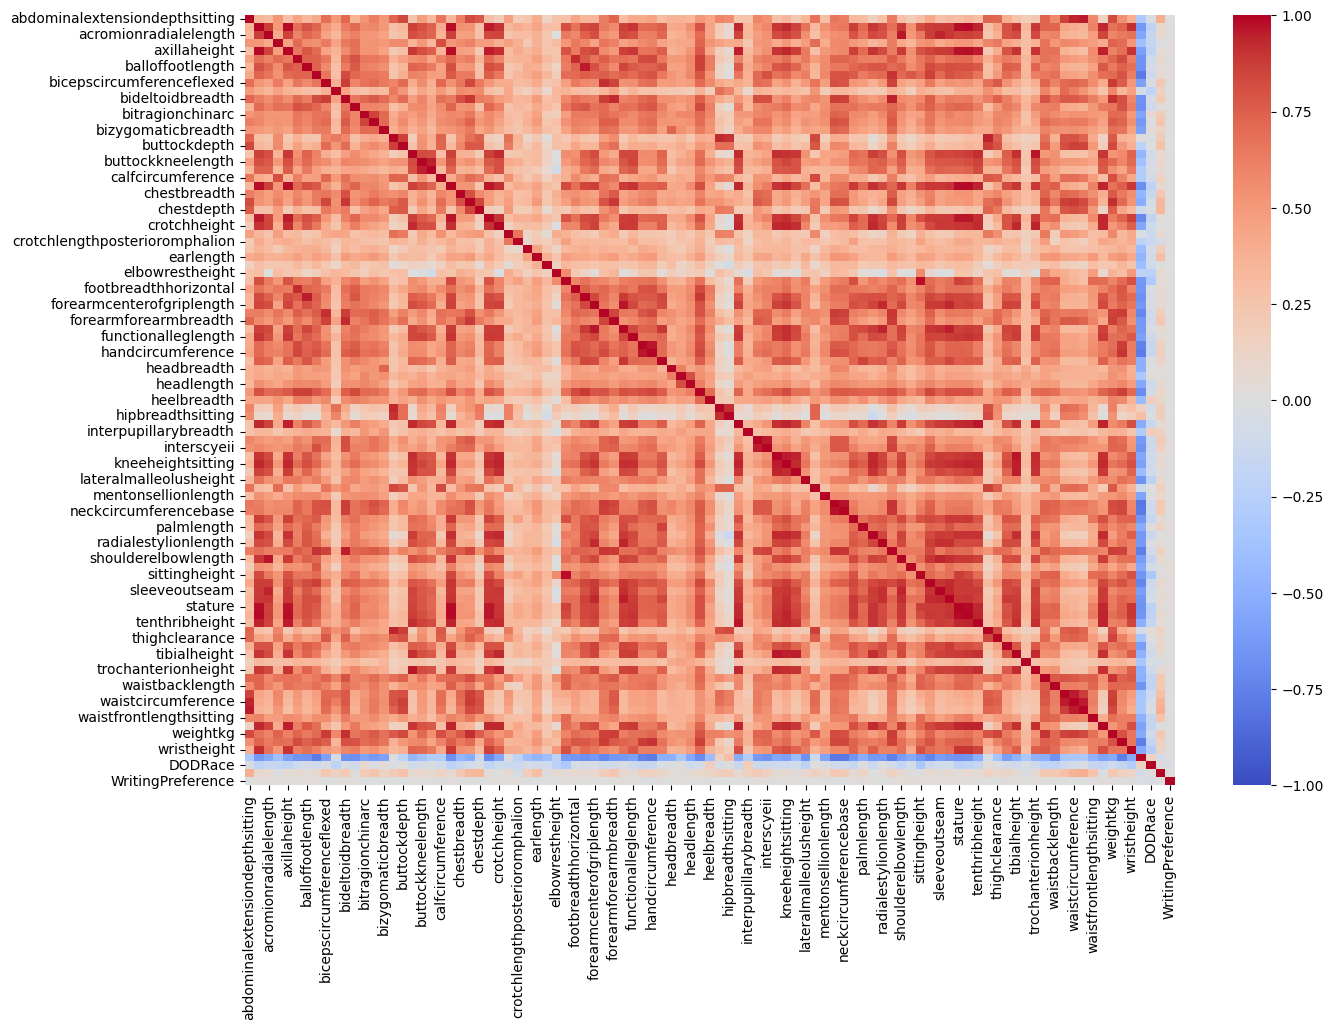

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),vmin = -1, vmax =1, cmap="coolwarm");

<Axes: >

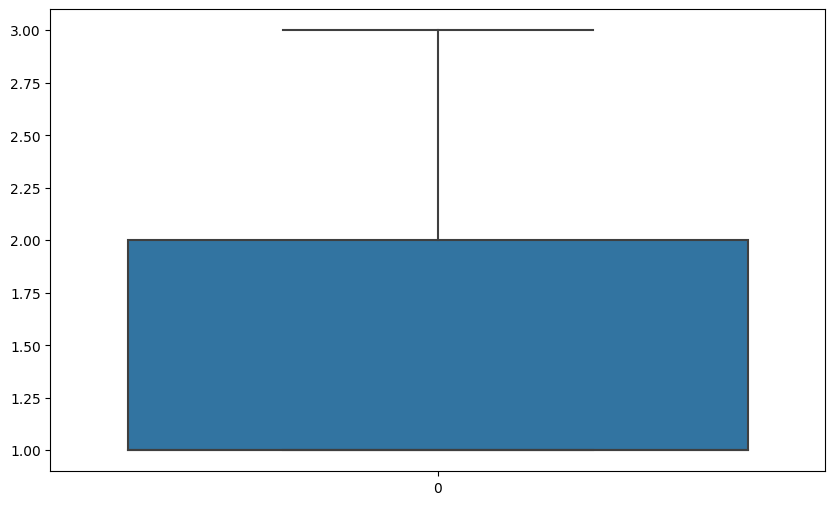

In [ ]:
#Outliers in DODRace Column
plt.figure(figsize=(10,6))
sns.boxplot(df.DODRace)

In [ ]:
fig = plt.figure(figsize=(50,30), dpi=200)

for i, col in enumerate(df.select_dtypes(["float", "int"]).columns):
        plt.subplot(20,5,i+1)
        ax = sns.boxplot(x=df[col])

plt.tight_layout();

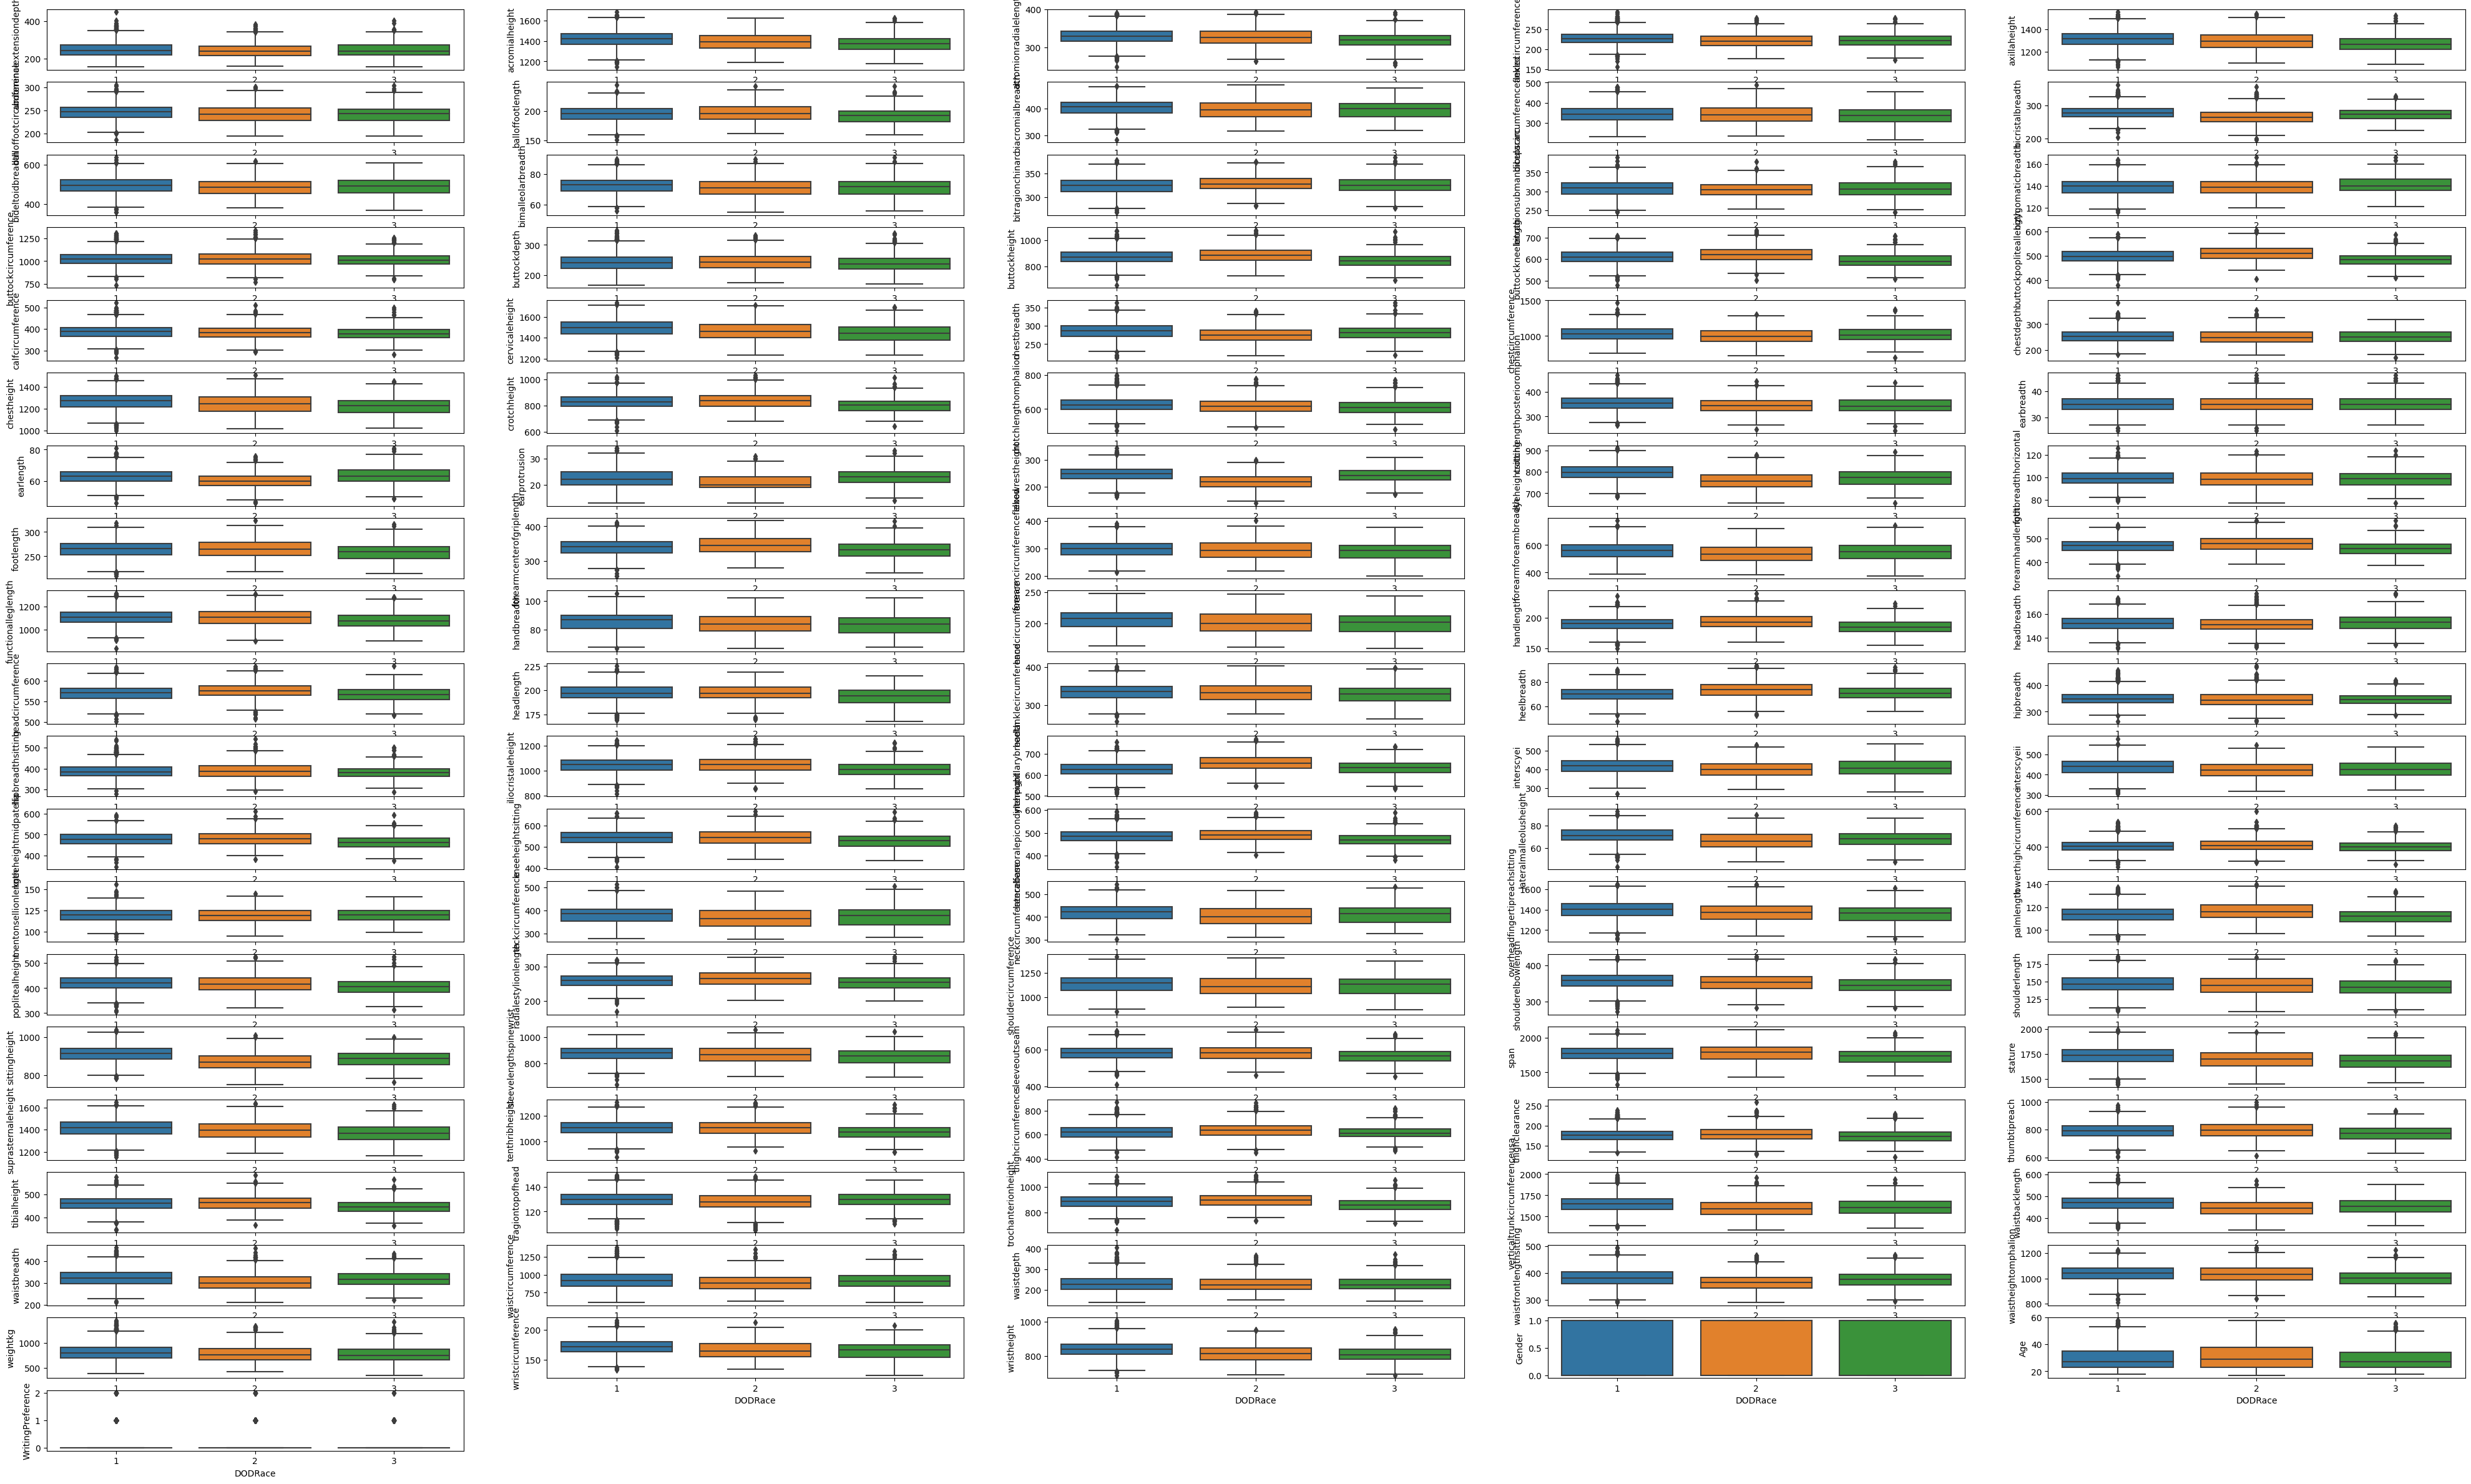

In [ ]:
index = 0
plt.figure(figsize=(50,30))
for feature in df.select_dtypes("number"):
    if feature != "DODRace":
        index += 1
        plt.subplot(20,5,index)
        sns.boxplot(x='DODRace',y=feature,data=df)

In [ ]:
# check multicollinearity
df_temp = df.corr()

count = 0
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count)

Number of strong corelated features: 0


In [ ]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

feature                       collinear
0    abdominalextensiondepthsitting              waistcircumference
1    abdominalextensiondepthsitting                      waistdepth
2                    acromialheight                    axillaheight
3                    acromialheight                 cervicaleheight
4                    acromialheight                     chestheight
5                    acromialheight              iliocristaleheight
6                    acromialheight               kneeheightsitting
7                    acromialheight                         stature
8                    acromialheight             suprasternaleheight
9                    acromialheight                  tenthribheight
10                   acromialheight            waistheightomphalion
11                   acromialheight                     wristheight
12            acromionradialelength             shoulderelbowlength
13            acromionradialelength                   sleeveoutseam
14                     axillaheight                  acromialheight
15                     axillaheight                 cervicaleheight
16                     axillaheight                     chestheight
17                     axillaheight                    crotchheight
18                     axillaheight              iliocristaleheight
19                     axillaheight            kneeheightmidpatella
20                     axillaheight               kneeheightsitting
21                     axillaheight                 poplitealheight
22                     axillaheight                         stature
23                     axillaheight             suprasternaleheight
24                     axillaheight                  tenthribheight
25                     axillaheight                    tibialheight
26                     axillaheight            waistheightomphalion
27                     axillaheight                     wristheight
28          balloffootcircumference           footbreadthhorizontal
29                 balloffootlength                      footlength
30                biacromialbreadth           shouldercircumference
31        bicepscircumferenceflexed      forearmcircumferenceflexed
32                 bideltoidbreadth           forearmforearmbreadth
33                 bideltoidbreadth           shouldercircumference
34                 bideltoidbreadth                        weightkg
35             buttockcircumference                      hipbreadth
36             buttockcircumference              thighcircumference
37                    buttockheight                    crotchheight
38                    buttockheight              iliocristaleheight
39                    buttockheight            kneeheightmidpatella
40                    buttockheight               kneeheightsitting
41                    buttockheight                  tenthribheight
42                    buttockheight                    tibialheight
43                    buttockheight             trochanterionheight
44                buttockkneelength          buttockpopliteallength
45           buttockpopliteallength               buttockkneelength
46                  cervicaleheight                  acromialheight
47                  cervicaleheight                    axillaheight
48                  cervicaleheight                     chestheight
49                  cervicaleheight                    crotchheight
50                  cervicaleheight             functionalleglength
51                  cervicaleheight              iliocristaleheight
52                  cervicaleheight            kneeheightmidpatella
53                  cervicaleheight               kneeheightsitting
54                  cervicaleheight                 poplitealheight
55                  cervicaleheight                            span
56                  cervicaleheight                         stature
57                  cervicaleheight             suprasternaleheight
58              

In [ ]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

In [ ]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

# 4. DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df.drop(columns ='DODRace', axis =1)
# X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)
# use stratify=y whether your data is inbalanced or balanced.
#I put 80% for training and 20% for testing, since the dataset is small and imbalanced

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [ ]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

# Distributed targets 80% to the train set and 20% to the test set.

White      0.657
Black      0.225
Hispanic   0.118
Name: DODRace, dtype: float64

White      0.657
Black      0.225
Hispanic   0.118
Name: DODRace, dtype: float64

White      0.657
Black      0.225
Hispanic   0.118
Name: DODRace, dtype: float64


# 5. Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## eval_metric Function

In [ ]:

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set---------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set--------------------------------------------")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 5.1. Logistic model

### Vanilla Logistic Model

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
operations = [("OneHotEncoder", column_transform),("logistic",LogisticRegression(class_weight="balanced", random_state=101))]
logistic_pipe_model = Pipeline(steps = operations)
logistic_pipe_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [ ]:
y_pred = logistic_pipe_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [ ]:
y_pred_proba = logistic_pipe_model.predict_proba(X_test)
y_pred_proba

array([[6.79643362e-03, 2.46392432e-02, 9.68564323e-01],
       [3.01636581e-03, 3.64971734e-03, 9.93333917e-01],
       [2.73517328e-03, 4.68763772e-01, 5.28501055e-01],
       ...,
       [1.78261592e-02, 3.07917049e-02, 9.51382136e-01],
       [5.28197570e-02, 2.41181122e-01, 7.05999121e-01],
       [9.87609396e-05, 2.37755292e-01, 7.62145947e-01]])

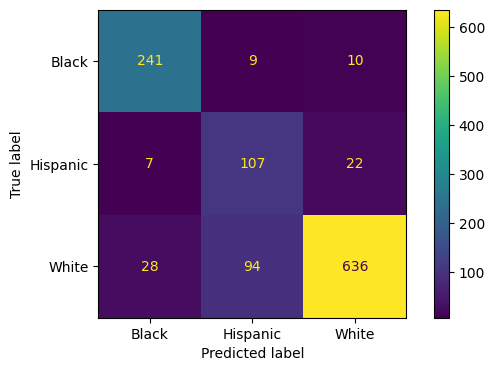

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_pipe_model,X_test,y_test)

In [ ]:
eval_metric(logistic_pipe_model, X_train, y_train, X_test, y_test)
#no overfitting
#Since the dataset is imbalance, so we need to focus more on Hispanics class to improve accuracy

Test_Set---------------------------------------------
[[241   9  10]
 [  7 107  22]
 [ 28  94 636]]
              precision    recall  f1-score   support

       Black       0.87      0.93      0.90       260
    Hispanic       0.51      0.79      0.62       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set--------------------------------------------
[[ 983   30   25]
 [  17  459   67]
 [  65  359 2610]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



### Cross Validate

In [ ]:
f1score = make_scorer(f1_score, average="weighted")

In [ ]:
operations = [("OneHotEncoder", column_transform),("logistic",LogisticRegression(class_weight="balanced", random_state=101))]

logistic_pipe_model_CV = Pipeline(steps=operations)

scores = cross_validate(logistic_pipe_model_CV, X_train, y_train, scoring = f1score, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
pd.DataFrame(df_scores)

fit_time  score_time  test_score  train_score
1      0.539       0.016       0.854        0.888
2      0.547       0.018       0.844        0.891
3      0.583       0.017       0.872        0.886
4      0.646       0.016       0.867        0.888
5      0.552       0.016       0.866        0.890
6      0.536       0.017       0.847        0.892
7      0.655       0.016       0.848        0.891
8      0.547       0.015       0.844        0.889
9      0.514       0.016       0.862        0.886
10     0.542       0.015       0.862        0.891

In [ ]:
pd.DataFrame(df_scores.mean()[2:])
#no overfitting

0
test_score  0.857
train_score 0.889

### Cross Validate for Hispanic       

In [ ]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])


Hispanic_scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [ ]:
operations = [("OneHotEncoder", column_transform),("logistic",LogisticRegression(class_weight="balanced", random_state=101))]
logistic_pipe_model_CV_Hispanic = Pipeline(steps=operations)

scores = cross_validate(logistic_pipe_model_CV_Hispanic, X_train, y_train, scoring = Hispanic_scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
pd.DataFrame(df_scores.mean()[2:])
#There is overfitting in Hispanic class

0
test_f1_Hispanic         0.580
train_f1_Hispanic        0.669
test_precision_Hispanic  0.473
train_precision_Hispanic 0.549
test_recall_Hispanic     0.753
train_recall_Hispanic    0.856

### Logistic Model GridsearchCV

In [ ]:
operations = [("OneHotEncoder", column_transform),("logistic",LogisticRegression(random_state=101, max_iter=50000))]

logistic_pipe_model = Pipeline(steps=operations)

In [ ]:
logistic_pipe_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['SubjectsBirthLocation'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('logistic', LogisticRegression(max_iter=50000, random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                   verbose_feature_names_out=False),
 'logistic': LogisticRegression(max_iter=50000, random_state=101),
 'OneHo

In [ ]:
param_grid = { "logistic__class_weight" : ["balanced", None],
               'logistic__penalty': ["l1","l2"],
               'logistic__solver' : ['saga','lbfgs','liblinear'],
               'logistic__C' :[0.001,0.01, 0.1, 0.5, 1, 5]
             }

In [ ]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"] )
# Hispanic class is the worst scoring for our model and we need to foucs on it

In [ ]:
logistic_pipe_model_grid_CV = GridSearchCV(logistic_pipe_model, param_grid = param_grid, cv=5, scoring = f1_Hispanic, return_train_score=True)

In [ ]:
logistic_pipe_model_grid_CV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(max_iter=50000,
                                                           random_state=101))]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 0.5, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['saga', 'lbfgs', 'liblinear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [ ]:
logistic_pipe_model_grid_CV.best_params_

{'logistic__C': 1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [ ]:
logistic_pipe_model_grid_CV.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=50000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
pd.DataFrame(logistic_pipe_model_grid_CV.cv_results_).loc[logistic_pipe_model_grid_CV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.646
mean_train_score   0.715
Name: 50, dtype: object

In [ ]:
y_pred = logistic_pipe_model_grid_CV.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

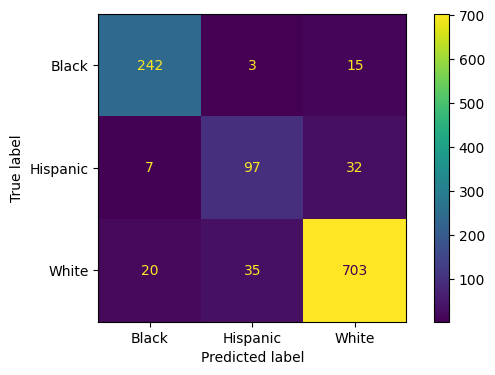

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_pipe_model_grid_CV, X_test, y_test);

In [ ]:
eval_metric(logistic_pipe_model_grid_CV, X_train, y_train, X_test, y_test)

Test_Set---------------------------------------------
[[242   3  15]
 [  7  97  32]
 [ 20  35 703]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.72      0.71      0.72       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.86      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set--------------------------------------------
[[ 990   12   36]
 [  29  382  132]
 [  41  147 2846]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.71      0.70      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.86      4615
weighted avg       0.91      0.91      0.91      4615



### Class prediction

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["Pred"] = y_pred
test_data["Pred_proba_Black"] = y_pred_proba[:,0]
test_data["Pred_proba_Hispanic"] = y_pred_proba[:,1]
test_data["Pred_proba_White"] = y_pred_proba[:,2]
test_data.sample(10)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
892                              263            1419                    343   
5534                             276            1286                    314   
1350                             270            1567                    356   
2278                             303            1526                    353   
2866                             246            1472                    338   
154                              244            1524                    349   
4566                             213            1240                    281   
5060                             232            1315                    327   
4968                             218            1293                    313   
673                              237            1446                    321   

      anklecircumference  axillaheight  balloffootcircumference  \
892                  225          1307                      244   
5534                 208          1190                      220   
1350                 235          1466                      246   
2278                 240          1406                      260   
2866                 239          1360                      261   
154                  243          1423                      271   
4566                 206          1170                      235   
5060                 240          1222                      236   
4968                 212          1203                      227   
673                  234          1349                      255   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
892                203                421                        439   
5534               184                323                        334   
1350               201                453                        359   
2278               211                441                        418   
2866               191                401                        354   
154                226                455                        387   
4566               174                349                        294   
5060               198                367                        299   
4968               178                339                        290   
673                192                416                        346   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
892                273               543                  74   
5534               265               457                  67   
1350               297               557                  75   
2278               308               559                  79   
2866               270               491                  67   
154                264               549                  83   
4566               254               425                  68   
5060               302               450                  71   
4968               253               421                  65   
673                273               508                  77   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
892                336                        318                 144   
5534               330                        298                 138   
1350               350                        321                 147   
2278               342                        306                 148   
2866               332                        325                 150   
154                360                        320                 152   
4566               306                        274                 131   
5060               301                        268                 135   
4968               298                        270                 126   
673                327                        327                 143   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
892               

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

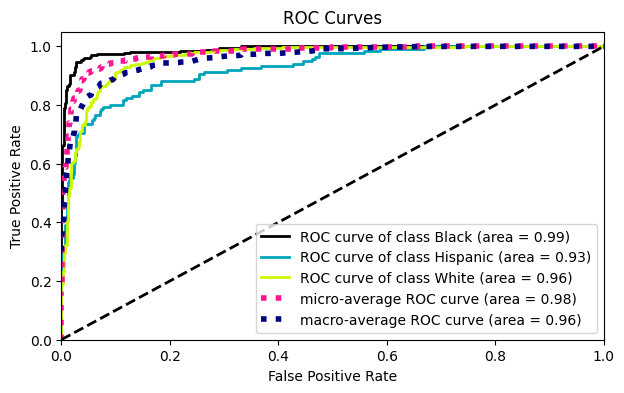

In [ ]:
operations = [("OneHotEncoder", column_transform), ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

logistic_best_pipe_model = Pipeline(steps=operations)

logistic_best_pipe_model.fit(X_train, y_train)

y_pred_proba = logistic_best_pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
# roc_auc score for Black

0.9874892445362244

In [ ]:
roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
# roc_auc score for Hispanic

0.9273806772217728

In [ ]:
roc_auc_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
# roc_auc score for White

0.9614915647237547

In [ ]:
y_test[:5]

2019       White
4046       White
5563       White
3806       White
653     Hispanic
Name: DODRace, dtype: object

In [ ]:
y_test_dummies[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

### Precision Recall Curve

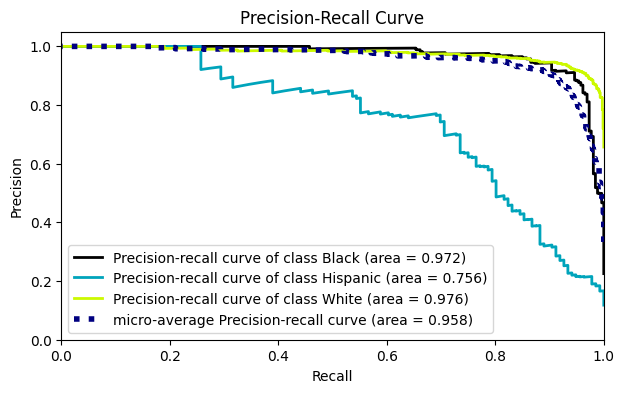

In [ ]:
operations = [("OneHotEncoder", column_transform), ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

logistic_best_pipe_model = Pipeline(steps=operations)

logistic_best_pipe_model.fit(X_train, y_train)

y_pred_proba = logistic_best_pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
# PR score for Black

0.9716362528166805

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
# PR score for Hispanic

0.755632283016709

In [ ]:
average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])
# PR score for White

0.9758327677957138

### Best Logistic Regression Results

In [ ]:
operations = [("OneHotEncoder", column_transform), ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

logistic_best_pipe_model = Pipeline(steps=operations)

logistic_best_pipe_model.fit(X_train, y_train)

y_test_dummies = pd.get_dummies(y_test).values

y_pred_proba = logistic_best_pipe_model.predict_proba(X_test)

y_pred = logistic_best_pipe_model.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:,1])
log_auc = roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:,1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

print("Best Logistic model results:")
print(f"AP: {log_AP}, AUC: {log_auc}, F1_score: {log_f1[0]}, Recall: {log_recall[0]}")


Best Logistic model results:
AP: 0.755632283016709, AUC: 0.9273879001502369, F1_score: 0.7158671586715867, Recall: 0.7132352941176471


## 5.2. SVC

### Vanilla SVC model

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)


In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(probability=True , class_weight="balanced", random_state=101))]
SVM_pipe_model = Pipeline(steps=operations)

In [ ]:
SVM_pipe_model.fit(X_train, y_train)
eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set---------------------------------------------
[[233   8  19]
 [  4 110  22]
 [ 18  87 653]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90       260
    Hispanic       0.54      0.81      0.65       136
       White       0.94      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set--------------------------------------------
[[ 981   27   30]
 [  12  487   44]
 [  42  290 2702]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.61      0.90      0.72       543
       White       0.97      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



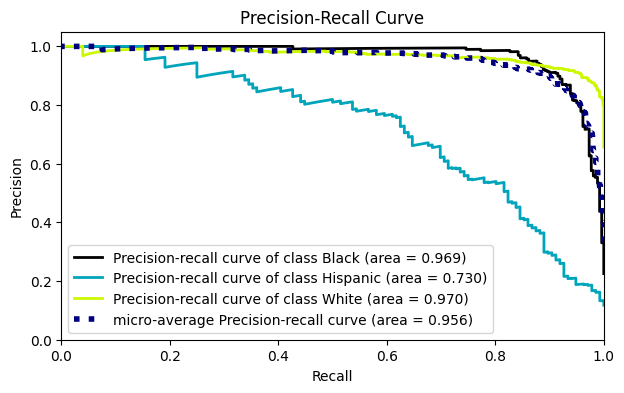

In [ ]:
y_pred_proba = SVM_pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Cross Validate

In [ ]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

Hispanic_scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}


In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(probability=True , class_weight="balanced", random_state=101))]
SVM_pipe_model_CV = Pipeline(steps=operations)

scores = cross_validate(SVM_pipe_model_CV,
                        X_train,
                        y_train,
                        scoring=Hispanic_scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
pd.DataFrame(df_scores[2:])

fit_time  score_time  test_f1_Hispanic  train_f1_Hispanic  \
3     11.059       0.300             0.591              0.718   
4     11.848       0.544             0.608              0.725   
5     10.804       0.328             0.576              0.724   
6     10.915       0.321             0.603              0.741   
7     10.945       0.334             0.565              0.729   
8     14.781       0.666             0.576              0.726   
9     12.849       0.331             0.647              0.720   
10    10.324       0.343             0.574              0.728   

    test_precision_Hispanic  train_precision_Hispanic  test_recall_Hispanic  \
3                     0.506                     0.601                 0.709   
4                     0.535                     0.607                 0.704   
5                     0.471                     0.604                 0.741   
6                     0.500                     0.625                 0.759   
7                     0.464                     0.615                 0.722   
8                     0.507                     0.605                 0.667   
9                     0.544                     0.599                 0.796   
10                    0.515                     0.610                 0.648   

    train_recall_Hispanic  
3                   0.893  
4                   0.902  
5                   0.902  
6                   0.910  
7                   0.896  
8                   0.906  
9                   0.900  
10                  0.902

In [ ]:
pd.DataFrame(df_scores.mean()[2:])
#Overfitting in Hispanic class

0
test_f1_Hispanic         0.601
train_f1_Hispanic        0.725
test_precision_Hispanic  0.510
train_precision_Hispanic 0.607
test_recall_Hispanic     0.735
train_recall_Hispanic    0.901

###  SVC Model GridsearchCV

In [ ]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.01, 0.1,0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__decision_function_shape' : ['ovr','ovo'],
              'SVC__class_weight': ["balanced", None]}

In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(probability=True , random_state=101))]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid_CV = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              scoring=f1_Hispanic,
                              cv=5,
                              return_train_score=True)


In [ ]:
SVM_pipe_model_grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__decision_function_shape': ['ovr', 'ovo'],
                         'SVC__gamma': ['scale', 'auto', 0.01, 0.1, 0.5],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [ ]:
SVM_pipe_model_grid_CV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=0.1, kernel='linear', probability=True))])

In [ ]:
SVM_pipe_model_grid_CV.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': None,
 'SVC__decision_function_shape': 'ovr',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [ ]:
pd.DataFrame(SVM_pipe_model_grid_CV.cv_results_).loc[SVM_pipe_model_grid_CV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.646
mean_train_score   0.722
Name: 141, dtype: object

In [ ]:
eval_metric(SVM_pipe_model_grid_CV, X_train, y_train, X_test, y_test)

Test_Set---------------------------------------------
[[239   3  18]
 [  6  84  46]
 [ 13  17 728]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.81      0.62      0.70       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set--------------------------------------------
[[ 977   11   50]
 [  25  338  180]
 [  20   55 2959]]
              precision    recall  f1-score   support

       Black       0.96      0.94      0.95      1038
    Hispanic       0.84      0.62      0.71       543
       White       0.93      0.98      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.91      0.85      0.87      4615
weighted avg       0.92      0.93      0.92      4615



### CLass Prediction

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["Pred"] = y_pred
test_data["Pred_proba_Black"] = y_pred_proba[:,0]
test_data["Pred_proba_Hispanic"] = y_pred_proba[:,1]
test_data["Pred_proba_White"] = y_pred_proba[:,2]
test_data.sample(10)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
2797                             220            1411                    340   
4423                             204            1312                    307   
807                              264            1537                    360   
5392                             214            1256                    305   
4938                             202            1352                    314   
5404                             242            1305                    318   
4893                             238            1257                    289   
4507                             250            1314                    302   
5670                             201            1305                    305   
5508                             227            1422                    348   

      anklecircumference  axillaheight  balloffootcircumference  \
2797                 215          1315                      243   
4423                 217          1223                      227   
807                  220          1434                      260   
5392                 217          1157                      240   
4938                 188          1250                      213   
5404                 234          1220                      228   
4893                 200          1168                      221   
4507                 255          1222                      227   
5670                 204          1213                      209   
5508                 224          1315                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
2797               198                399                        323   
4423               181                354                        257   
807                216                415                        346   
5392               176                365                        320   
4938               180                372                        235   
5404               186                373                        327   
4893               175                365                        278   
4507               190                407                        362   
5670               175                340                        322   
5508               198                387                        313   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
2797               269               479                  70   
4423               244               415                  65   
807                262               505                  76   
5392               280               482                  64   
4938               258               424                  66   
5404               265               457                  65   
4893               295               465                  65   
4507               287               494                  70   
5670               254               417                  64   
5508               305               457                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
2797               310                        288                 138   
4423               324                        283                 129   
807                344                        328                 145   
5392               307                        289                 131   
4938               289                        274                 133   
5404               304                        272                 129   
4893               327                        293                 139   
4507               318                        273                 137   
5670               299                        266                 131   
5508               306                        287                 136   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
2797              

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

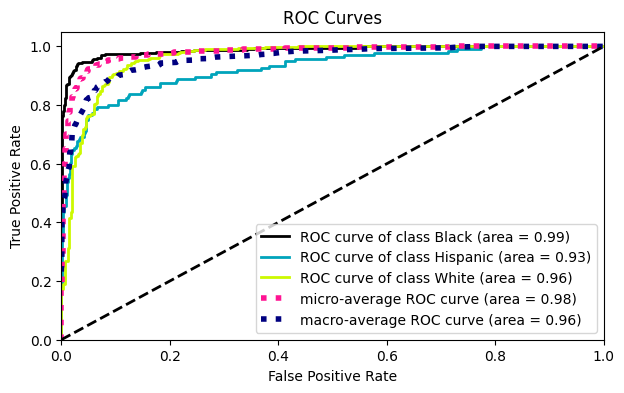

In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(C= 0.1, gamma= "scale", kernel= 'linear', probability=True, class_weight=None, decision_function_shape = 'ovr',random_state=101))]

SVM_Best_pipe_model = Pipeline(steps=operations)

SVM_Best_pipe_model.fit(X_train, y_train)

y_pred_proba = SVM_Best_pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

### Precision Recall Curve

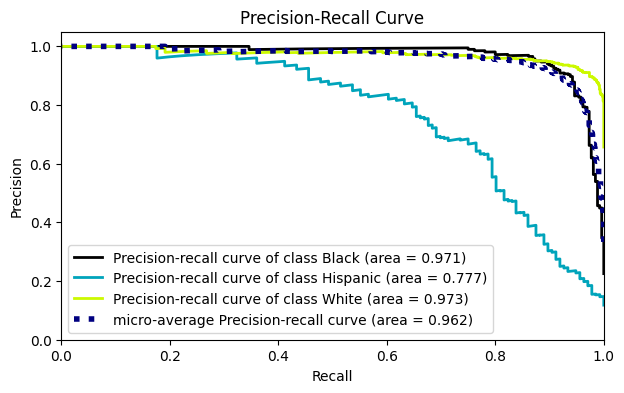

In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(C= 0.1, gamma= "scale", kernel= 'linear', probability=True, class_weight=None, decision_function_shape = 'ovr',random_state=101))]
SVM_Best_pipe_model = Pipeline(steps=operations)

SVM_Best_pipe_model.fit(X_train, y_train)

y_pred_proba = SVM_Best_pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Best SVC Results

In [ ]:
operations = [("OneHotEncoder", column_transform),("SVC", SVC(C= 0.1, gamma= "scale", kernel= 'linear', probability=True, class_weight=None, decision_function_shape = 'ovr',random_state=101))]
SVM_Best_pipe_model = Pipeline(steps=operations)

SVM_Best_pipe_model.fit(X_train, y_train)

y_pred_proba = SVM_Best_pipe_model.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test).values

y_pred = SVM_Best_pipe_model.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:,1], y_pred_proba[:,1])
svc_auc = roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

print("Best SVM model results:")
print(f"AP: {svc_AP}, AUC: {svc_auc}, F1_score: {svc_f1[0]}, Recall: {svc_recall[0]}")


Best SVM model results:
AP: 0.7766812065952936, AUC: 0.9254232636079972, F1_score: 0.7, Recall: 0.6176470588235294


## 5.3. RF

### Vanilla RF Model

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [ ]:
ord_enccoding = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_transformer = make_column_transformer((ord_enccoding, categoricals_cols), remainder='passthrough')

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier(class_weight="balanced",random_state=101))]
RF_pipe_model = Pipeline(steps=operations)

In [ ]:
RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

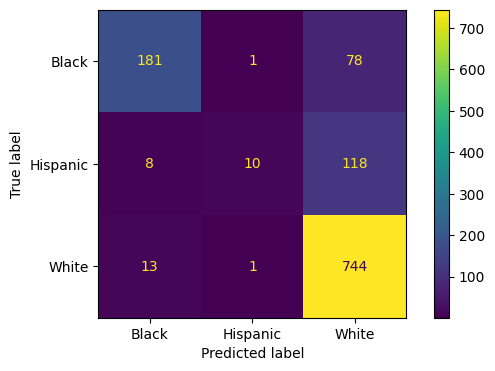

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_pipe_model,X_test,y_test)

In [ ]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)
# Overfitting

Test_Set---------------------------------------------
[[181   1  78]
 [  8  10 118]
 [ 13   1 744]]
              precision    recall  f1-score   support

       Black       0.90      0.70      0.78       260
    Hispanic       0.83      0.07      0.14       136
       White       0.79      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.84      0.58      0.60      1154
weighted avg       0.82      0.81      0.77      1154


Train_Set--------------------------------------------
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross Validation

In [ ]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

Hispanic_scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}



In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier(class_weight="balanced",random_state=101))]
RF_pipe_model_CV = Pipeline(steps=operations)

scores = cross_validate(RF_pipe_model_CV,
                        X_train,
                        y_train,
                        scoring=Hispanic_scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
pd.DataFrame(df_scores[2:])

fit_time  score_time  test_f1_Hispanic  train_f1_Hispanic  \
3      2.285       0.032             0.034              1.000   
4      2.261       0.031             0.069              1.000   
5      2.257       0.039             0.000              1.000   
6      2.364       0.052             0.071              1.000   
7      2.988       0.032             0.070              1.000   
8      2.257       0.031             0.036              1.000   
9      2.551       0.033             0.167              1.000   
10     2.269       0.034             0.036              1.000   

    test_precision_Hispanic  train_precision_Hispanic  test_recall_Hispanic  \
3                     0.333                     1.000                 0.018   
4                     0.500                     1.000                 0.037   
5                     0.000                     1.000                 0.000   
6                     1.000                     1.000                 0.037   
7                     0.667                     1.000                 0.037   
8                     0.500                     1.000                 0.019   
9                     0.833                     1.000                 0.093   
10                    0.500                     1.000                 0.019   

    train_recall_Hispanic  
3                   1.000  
4                   1.000  
5                   1.000  
6                   1.000  
7                   1.000  
8                   1.000  
9                   1.000  
10                  1.000

In [ ]:
pd.DataFrame(df_scores.mean()[2:])

0
test_f1_Hispanic         0.069
train_f1_Hispanic        1.000
test_precision_Hispanic  0.633
train_precision_Hispanic 1.000
test_recall_Hispanic     0.037
train_recall_Hispanic    1.000

### RF Model GridsearchCV

In [ ]:
param_grid = {'RF__n_estimators':[400,500],
             'RF__criterion': ["gini","entropy"],
             'RF__max_depth':[2, 3, 5, 6],
             'RF__min_samples_split':[18,20,22],
             'RF__class_weight': ['balanced',None],
             'RF__max_features': ['auto', None, 30, 50]
              }

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier( random_state=101))]
RF_pipe_model = Pipeline(steps=operations)

RF_pipe_model_grid_CV = GridSearchCV(RF_pipe_model,
                              param_grid,
                              scoring=f1_Hispanic,
                              n_jobs=-1,
                              cv =5,
                              verbose=3,
                              return_train_score=True)


In [ ]:
RF_pipe_model_grid_CV.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF__class_weight': ['balanced', None],
                         'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [2, 3, 5, 6],
                         'RF__max_features': ['auto', None, 30, 50],
                         'RF__min_samples_split': [18, 20, 22],
                         'RF__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [ ]:
RF_pipe_model_grid_CV.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        max_features=50, min_samples_split=20,
                                        n_estimators=500, random_state=101))])

In [ ]:
pd.DataFrame(RF_pipe_model_grid_CV.cv_results_).loc[RF_pipe_model_grid_CV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.379
mean_train_score   0.548
Name: 93, dtype: object

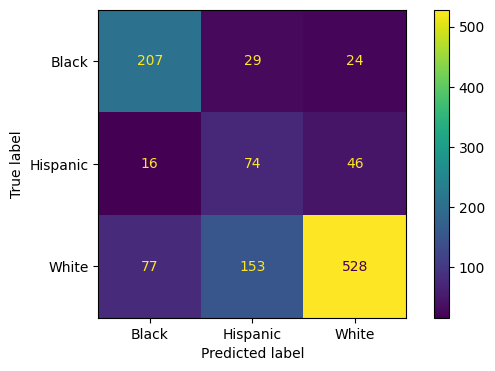

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_pipe_model_grid_CV,X_test,y_test)

In [ ]:
eval_metric(RF_pipe_model_grid_CV, X_train, y_train, X_test, y_test)

Test_Set---------------------------------------------
[[207  29  24]
 [ 16  74  46]
 [ 77 153 528]]
              precision    recall  f1-score   support

       Black       0.69      0.80      0.74       260
    Hispanic       0.29      0.54      0.38       136
       White       0.88      0.70      0.78       758

    accuracy                           0.70      1154
   macro avg       0.62      0.68      0.63      1154
weighted avg       0.77      0.70      0.72      1154


Train_Set--------------------------------------------
[[ 898   73   67]
 [  26  420   97]
 [ 170  581 2283]]
              precision    recall  f1-score   support

       Black       0.82      0.87      0.84      1038
    Hispanic       0.39      0.77      0.52       543
       White       0.93      0.75      0.83      3034

    accuracy                           0.78      4615
   macro avg       0.71      0.80      0.73      4615
weighted avg       0.84      0.78      0.80      4615



### ROC Curve and AUC

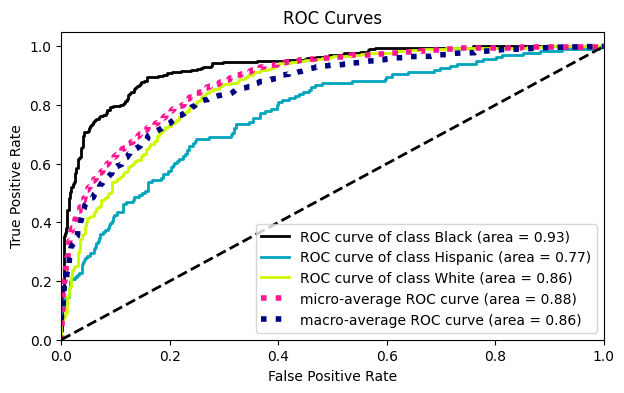

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier( class_weight='balanced',  max_depth=6, max_features=50, min_samples_split=20, n_estimators=500,random_state=101))]

RF_best_pipe_model = Pipeline(steps=operations)

RF_best_pipe_model.fit(X_train,y_train)

y_pred_proba = RF_best_pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

### PR Curve

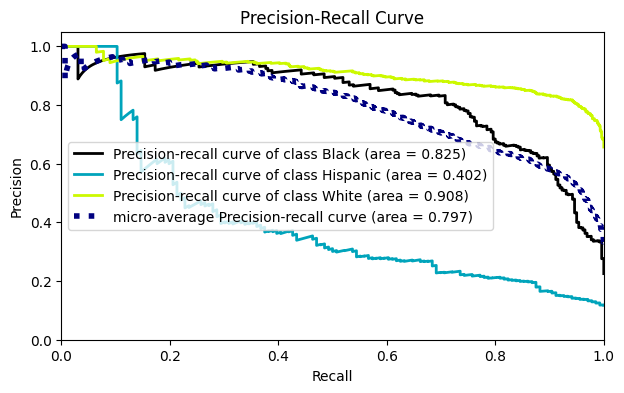

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier( class_weight='balanced',  max_depth=6, max_features=50, min_samples_split=20, n_estimators=500,random_state=101))]

RF_best_pipe_model = Pipeline(steps=operations)

RF_best_pipe_model.fit(X_train,y_train)

y_pred_proba = RF_best_pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### Best Random Forest Results

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("RF", RandomForestClassifier( class_weight='balanced',  max_depth=6, max_features=50, min_samples_split=20, n_estimators=500,random_state=101))]

RF_best_pipe_model = Pipeline(steps=operations)

RF_best_pipe_model.fit(X_train,y_train)

y_pred_proba = RF_best_pipe_model.predict_proba(X_test)

y_pred = RF_best_pipe_model.predict(X_test)

y_test_dummies = pd.get_dummies(y_test).values

rf_AP = average_precision_score(y_test_dummies[:,1], y_pred_proba[:,1])
rf_auc = roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

print("Best Random Forest model results:")
print(f"AP: {rf_AP}, AUC: {rf_auc}, F1_score: {rf_f1[0]}, Recall: {rf_recall[0]}")


Best Random Forest model results:
AP: 0.4018877686153911, AUC: 0.7729183520166416, F1_score: 0.37755102040816324, Recall: 0.5441176470588235


## 5.4. XGBoost

### Vanilla XGBoost Model

In [ ]:
y_train_xgboot = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgboot = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# need to map the labels since it works only on the numerical data.

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier( random_state=101))]
XGBoost_pipe_model = Pipeline(steps=operations)

In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train3)
classes_weights
# It has no class_weight hyperparameter for multiclass, so use the sample_weight hyperparameter within the fit function.

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [ ]:
data = {"weights": classes_weights, "label": y_train_xgboot}
dataf = pd.DataFrame(data)

dataf.head()

weights  label
893     2.833      1
196     0.507      2
3821    0.507      2
3206    0.507      2
4500    1.482      0

In [ ]:
dataf.groupby("label").value_counts()

label  weights
0      1.482      1038
1      2.833       543
2      0.507      3034
dtype: int64

In [ ]:
XGBoost_pipe_model.fit(X_train, y_train_xgboot, XGBoost__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

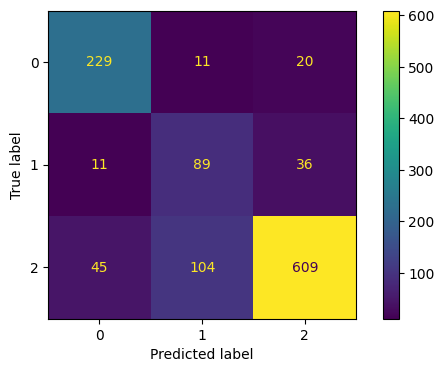

In [ ]:
ConfusionMatrixDisplay.from_estimator(XGBoost_pipe_model,X_test,y_test_xgboot)

In [ ]:
eval_metric(XGBoost_pipe_model, X_train, y_train_xgboot, X_test, y_test_xgboot)

Test_Set---------------------------------------------
[[229  11  20]
 [ 11  89  36]
 [ 45 104 609]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       260
           1       0.44      0.65      0.52       136
           2       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.83      0.80      0.81      1154


Train_Set--------------------------------------------
[[ 977   27   34]
 [  15  471   57]
 [  79  323 2632]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1038
           1       0.57      0.87      0.69       543
           2       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



### Cross Validation

In [ ]:
f1_Hispanic_xgb = make_scorer(f1_score, average = None, labels =[1])
precision_Hispanic_xgb = make_scorer(precision_score, average = None, labels =[1])
recall_Hispanic_xgb = make_scorer(recall_score, average = None, labels =[1])

Hispanic_scoring_xgb = {"f1_Hispanic":f1_Hispanic_xgb,
           "precision_Hispanic":precision_Hispanic_xgb,
           "recall_Hispanic":recall_Hispanic_xgb}


In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier( random_state=101))]
XGBoost_pipe_model_CV = Pipeline(steps=operations)

scores = cross_validate(XGBoost_pipe_model_CV,
                        X_train,
                        y_train_xgboot,
                        scoring=Hispanic_scoring_xgb,
                        cv = 10,
                        return_train_score=True,
                        fit_params={"XGBoost__sample_weight":classes_weights})

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1,11))
pd.DataFrame(df_scores.mean()[2:])
#Overfitting in Hispanic class

0
test_f1_Hispanic         0.515
train_f1_Hispanic        0.702
test_precision_Hispanic  0.438
train_precision_Hispanic 0.585
test_recall_Hispanic     0.628
train_recall_Hispanic    0.877

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"XGBoost__n_estimators":[50 , 100, 200, 300],
              'XGBoost__max_depth':[3,4,5,6],
              "XGBoost__learning_rate": [0.01, 0.1, 0.2, 0.3],
              "XGBoost__subsample":[0.5, 0.8, 1],
              "XGBoost__colsample_bytree":[0.5,0.8, 1]}

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier(random_state=101))]
XGBoost_pipe_model = Pipeline(steps=operations)

XGBoost_pipe_model_grid_CV = GridSearchCV(XGBoost_pipe_model,
                              param_grid,
                              scoring=f1_Hispanic_xgb,
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True,
                                          )

In [ ]:
XGBoost_pipe_model_grid_CV.fit(X_train, y_train_xgboot, XGBoost__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', StandardScaler()),
                                       ('XGBoost',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGBoost__colsample_bytree': [0.5, 0.8, 1],
                         'XGBoost__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'XGBoost__max_depth': [3, 4, 5, 6],
                         'XGBoost__n_estimators': [50, 100, 200, 300],
                         'XGBoost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[1]))

In [ ]:
XGBoost_pipe_model_grid_CV.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(colsample_bytree=0.5, max_depth=4,
                               n_estimators=200, objective='multi:softprob',
                               random_state=101))])

In [ ]:
XGBoost_pipe_model_grid_CV.best_params_

{'XGBoost__colsample_bytree': 0.5,
 'XGBoost__learning_rate': 0.1,
 'XGBoost__max_depth': 4,
 'XGBoost__n_estimators': 200,
 'XGBoost__subsample': 1}

In [ ]:
pd.DataFrame(XGBoost_pipe_model_grid_CV.cv_results_).loc[ XGBoost_pipe_model_grid_CV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.582
mean_train_score   0.972
Name: 68, dtype: object

In [ ]:
XGBoost_pipe_model_grid_CV.best_score_

0.5817326331379538

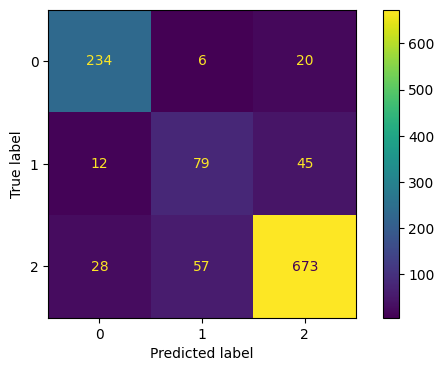

In [ ]:
ConfusionMatrixDisplay.from_estimator(XGBoost_pipe_model_grid_CV,X_test,y_test_xgboot)

In [ ]:
eval_metric(XGBoost_pipe_model_grid_CV, X_train, y_train_xgboot, X_test, y_test_xgboot)

Test_Set---------------------------------------------
[[234   6  20]
 [ 12  79  45]
 [ 28  57 673]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       260
           1       0.56      0.58      0.57       136
           2       0.91      0.89      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.79      0.78      1154
weighted avg       0.86      0.85      0.86      1154


Train_Set--------------------------------------------
[[1037    0    1]
 [   0  541    2]
 [  16   55 2963]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1038
           1       0.91      1.00      0.95       543
           2       1.00      0.98      0.99      3034

    accuracy                           0.98      4615
   macro avg       0.96      0.99      0.98      4615
weighted avg       0.99      0.98      0.98      4615



### ROC Curve and AUC

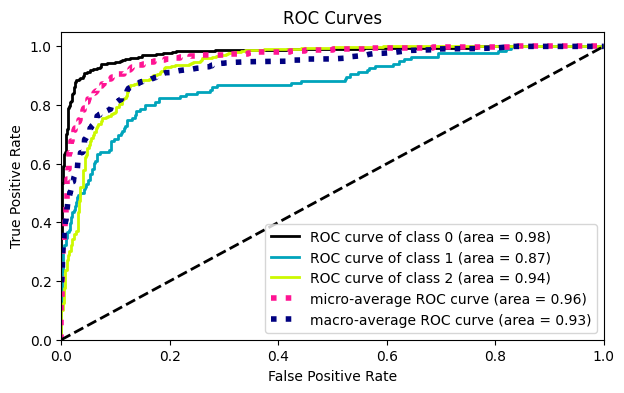

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier(colsample_bytree = 0.5,
                                                learning_rate = 0.1, max_depth = 4, n_estimators = 200, subsample = 1, random_state=101 ))]


XGBoost_best_pipe_model = Pipeline(steps = operations)

XGBoost_best_pipe_model.fit(X_train, y_train_xgboot, XGBoost__sample_weight=classes_weights)

y_pred_proba = XGBoost_best_pipe_model.predict_proba(X_test)

plot_roc(y_test_xgboot, y_pred_proba)
plt.show();

### PR Curve

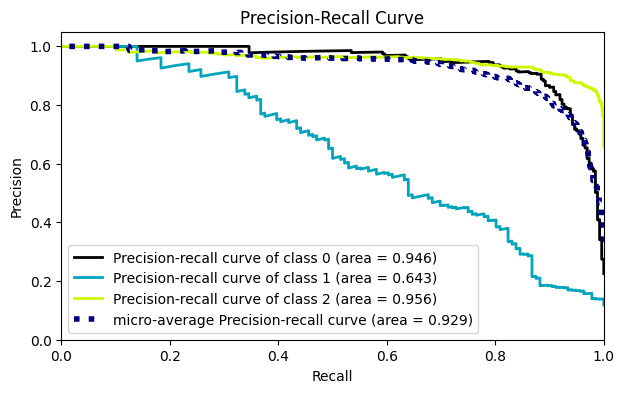

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier(colsample_bytree = 0.5,
                                                learning_rate = 0.1, max_depth = 4, n_estimators = 200, subsample = 1, random_state=101 ))]


XGBoost_best_pipe_model = Pipeline(steps = operations)

XGBoost_best_pipe_model.fit(X_train, y_train_xgboot, XGBoost__sample_weight=classes_weights)

y_pred_proba = XGBoost_best_pipe_model.predict_proba(X_test)

plot_precision_recall(y_test_xgboot, y_pred_proba)
plt.show();

### Best XGBoost Results

In [ ]:
operations = [("OrdinalEncoder", column_transformer),("scaler", StandardScaler()), ("XGBoost", XGBClassifier(colsample_bytree = 0.5,
                                                learning_rate = 0.1, max_depth = 4, n_estimators = 200, subsample = 1, random_state=101 ))]


XGBoost_best_pipe_model = Pipeline(steps = operations)

XGBoost_best_pipe_model.fit(X_train, y_train_xgboot, XGBoost__sample_weight=classes_weights)

y_pred_proba = XGBoost_best_pipe_model.predict_proba(X_test)

y_pred = XGBoost_best_pipe_model.predict(X_test)

y_test_dummies = pd.get_dummies(y_test_xgboot).values

xgb_AP = average_precision_score(y_test_dummies[:,1], y_pred_proba[:,1])
xgb_auc = roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])
xgb_f1 = f1_score(y_test_xgboot, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgboot, y_pred, average=None, labels=[1])

print("Best XGBoost model results:")
print(f"AP: {xgb_AP}, AUC: {xgb_auc}, F1_score: {xgb_f1[0]}, Recall: {xgb_recall[0]}")


Best XGBoost model results:
AP: 0.6430656686616352, AUC: 0.8729125736738704, F1_score: 0.5683453237410072, Recall: 0.5808823529411765


# 6. Comparing Models

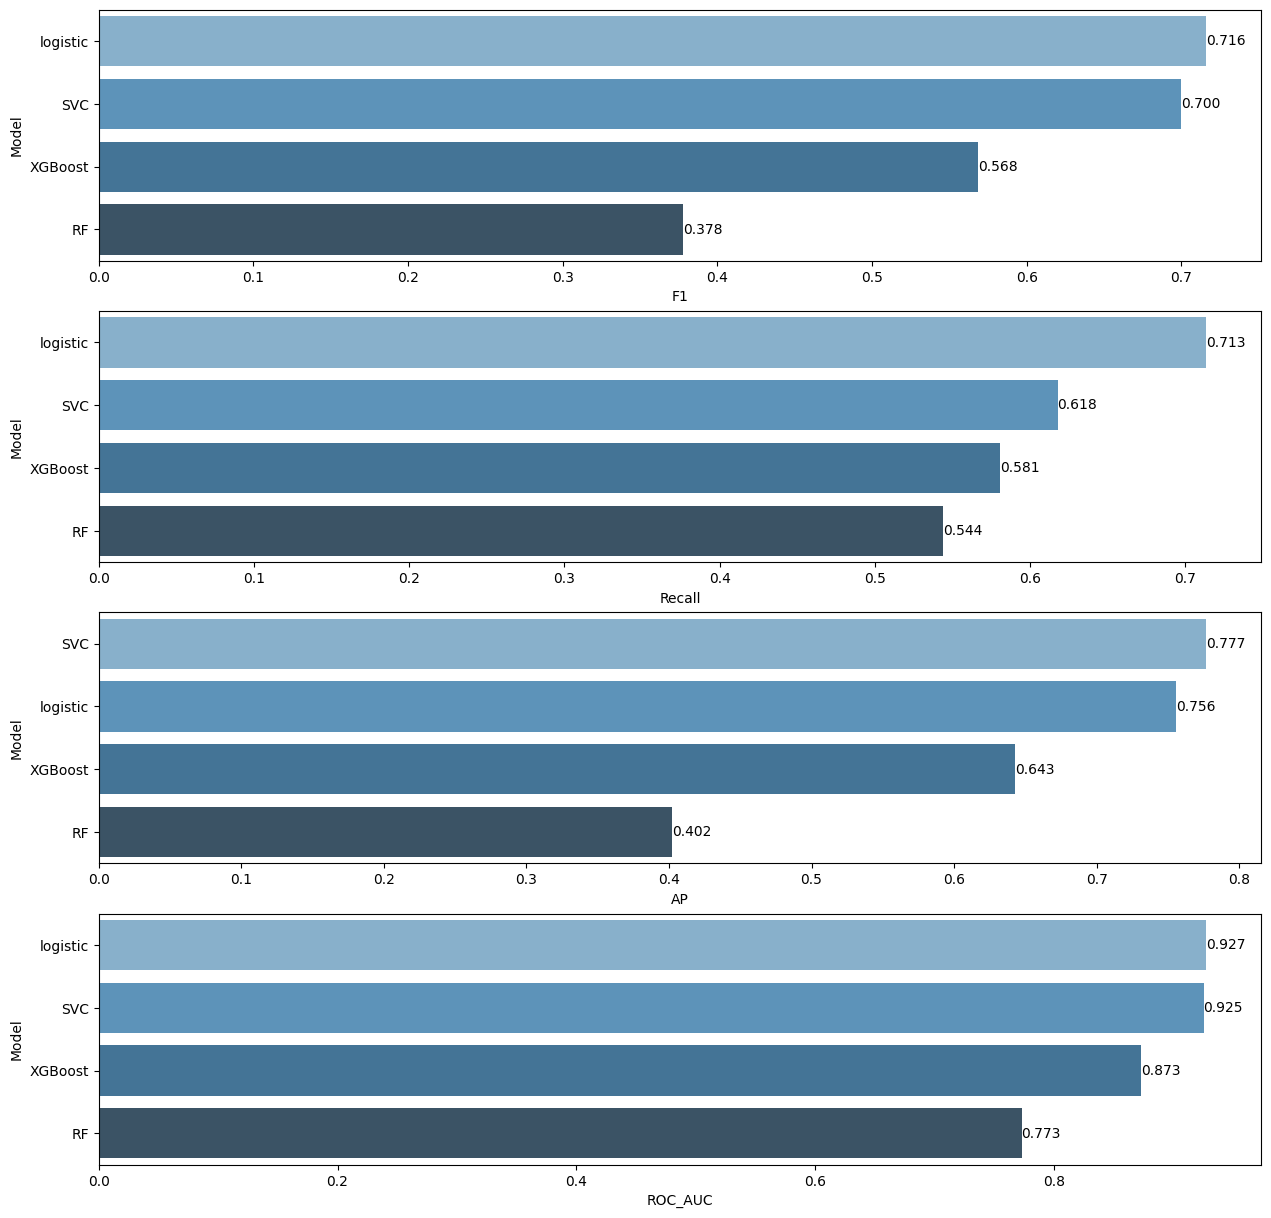

In [ ]:
compare = pd.DataFrame({"Model": ["logistic", "SVC",  "RF", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
                       "ROC_AUC":[log_auc, svc_auc, rf_auc,xgb_auc]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,15))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")       # average auc score
labels(ax)
plt.show()

---
---

---
---

# 7. Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
#The best model in logistic regression model
best_operations = [("OneHotEncoder", column_transform), ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

Best_model = Pipeline(steps = best_operations)

Best_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=50000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        5769.000        5769.000               5769.000   
mean                          247.254        1408.630                328.072   
std                            37.458          78.303                 20.445   
min                           155.000        1146.000                249.000   
25%                           220.000        1353.000                314.000   
50%                           243.000        1412.000                328.000   
75%                           272.000        1464.000                342.000   
max                           451.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            5769.000      5769.000                 5769.000   
mean              225.202      1301.903                  244.408   
std                15.966        71.261                   16.804   
min               156.000      1062.000                  186.000   
25%               214.000      1252.000                  233.000   
50%               225.000      1304.000                  245.000   
75%               235.000      1351.000                  256.000   
max               293.000      1553.000                  306.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          5769.000           5769.000                   5769.000   
mean            195.119            399.706                    341.663   
std              13.379             30.124                     41.271   
min             151.000            283.000                    216.000   
25%             186.000            377.000                    312.000   
50%             196.000            404.000                    342.000   
75%             205.000            422.000                    370.000   
max             245.000            489.000                    490.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          5769.000          5769.000            5769.000   
mean            274.903           491.455              72.335   
std              19.240            42.012               5.327   
min             197.000           357.000              55.000   
25%             262.000           461.000              68.000   
50%             274.000           493.000              73.000   
75%             288.000           520.000              76.000   
max             362.000           637.000              91.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          5769.000                   5769.000            5769.000   
mean            324.962                    306.678             139.529   
std              17.050                     20.819               7.249   
min             267.000                    245.000             116.000   
25%             314.000                    292.000             134.000   
50%             326.000                    307.000             140.000   
75%             336.000                    321.000             145.000   
max             385.000                    390.000             166.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              5769.000      5769.000       5769.000           5769.000   
mean               1022.059       242.234        872.113            610.450   
std                  75.953        26.409         54.065             33.121   
min                 737.000       168.000        656.000            479.000   
25%                 970.000       223.000        834.000            587.000   
50%                1019.000       241.000        870.000            610.000   
75%                1071.000       259.000        908.000            633.000   
max                1341.000       349.000       1080.000            736.000   

       buttockpopliteallength  calfcircumference  

In [ ]:
human_avg = X.describe().loc["mean"]
human_avg

abdominalextensiondepthsitting    247.254
acromialheight                   1408.630
acromionradialelength             328.072
anklecircumference                225.202
axillaheight                     1301.903
balloffootcircumference           244.408
balloffootlength                  195.119
biacromialbreadth                 399.706
bicepscircumferenceflexed         341.663
bicristalbreadth                  274.903
bideltoidbreadth                  491.455
bimalleolarbreadth                 72.335
bitragionchinarc                  324.962
bitragionsubmandibulararc         306.678
bizygomaticbreadth                139.529
buttockcircumference             1022.059
buttockdepth                      242.234
buttockheight                     872.113
buttockkneelength                 610.450
buttockpopliteallength            498.332
calfcircumference                 386.317
cervicaleheight                  1479.952
chestbreadth                      283.233
chestcircumference               1

In [ ]:
male_avg = X[X.Gender == 0].describe(include="all").loc["mean"]
male_avg

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
balloffootcircumference           252.166
balloffootlength                  201.230
biacromialbreadth                 416.004
bicepscircumferenceflexed         358.580
bicristalbreadth                  275.632
bideltoidbreadth                  510.928
bimalleolarbreadth                 74.844
bitragionchinarc                  331.656
bitragionsubmandibulararc         315.718
bizygomaticbreadth                142.435
buttockcircumference             1021.294
buttockdepth                      246.362
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
calfcircumference                 392.427
cervicaleheight                  1519.422
chestbreadth                      289.787
chestcircumference               1

In [ ]:
male_avg["Gender"] = 0 # "Male"
male_avg["SubjectsBirthLocation"] = "New York"
male_avg["WritingPreference"] = 0 #"Right hand"

In [ ]:
pd.DataFrame(male_avg).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                        255.449       1442.946               335.819   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean            229.591     1331.098                 252.166          201.230   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean           416.004                   358.580          275.632   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean          510.928             74.844          331.656   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                   315.718            142.435             1021.294   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean      246.362       889.500           619.217                504.001   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean           392.427        1519.422      289.787           1060.497   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean    254.390    1293.040      847.638               623.143   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                        356.355     36.095    64.171        23.110   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean         244.824          804.885               101.894    271.574   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                   349.573                    310.528   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean               580.702           480.929            1132.126      88.380   

     handcircumference handlength headbreadth headcircumference headlength  \
mean           212.571    193.509     154.184           574.708    199.761   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                344.002      72.565    346.257           379.948   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean           1063.413               639.949    431.394     450.629   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean              489.367           555.225                        492.626   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                 73.062                 409.671             122.685   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean           398.192               435.160                      1428.469   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean    116.610         430.685              268.314              1179.903   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean             364.306        149.832       918.679                897.179   

     sleeveoutseam     span  stature suprasternaleheight tenthribheight  \
mean       594.008 1816.629 1758.385            1440.700       1122.444   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean            626.335        180.739       813.085      469.223   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean          131.117             902.587                      1666.783   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean         478.018      327.111            943.043    238.560   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                 388.017             1058.240  858.714            176.169   

     wristheight Gender SubjectsBirthLocation    Age WritingPreference  
mean     848.762      0              New York 30.172                 0

In [ ]:
Best_model.predict(pd.DataFrame(male_avg).T)

# we can say that the average values of male soldiers are very
# close to White soldiers.

array(['White'], dtype=object)

In [ ]:
female_avg = X[X.Gender == 1].describe(include="all").loc["mean"]
female_avg

abdominalextensiondepthsitting    230.168
acromialheight                   1337.080
acromionradialelength             311.917
anklecircumference                216.050
axillaheight                     1241.028
balloffootcircumference           228.233
balloffootlength                  182.378
biacromialbreadth                 365.724
bicepscircumferenceflexed         306.391
bicristalbreadth                  273.384
bideltoidbreadth                  450.853
bimalleolarbreadth                 67.105
bitragionchinarc                  311.006
bitragionsubmandibulararc         287.828
bizygomaticbreadth                133.471
buttockcircumference             1023.655
buttockdepth                      233.627
buttockheight                     835.859
buttockkneelength                 592.170
buttockpopliteallength            486.511
calfcircumference                 373.577
cervicaleheight                  1397.656
chestbreadth                      269.567
chestcircumference                

In [ ]:
female_avg["Gender"] = 1 # "Female"
female_avg["SubjectsBirthLocation"] = "New York"
female_avg["WritingPreference"] = 0 #"Right hand"

In [ ]:
pd.DataFrame(female_avg).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                        230.168       1337.080               311.917   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean            216.050     1241.028                 228.233          182.378   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean           365.724                   306.391          273.384   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean          450.853             67.105          311.006   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                   287.828            133.471             1023.655   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean      233.627       835.859           592.170                486.511   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean           373.577        1397.656      269.567            948.541   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean    248.012    1173.495      784.296               621.757   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                        342.551     33.258    59.343        20.387   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean         231.650          747.856                92.704    246.704   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                   318.370                    264.665   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean               495.543           440.730            1046.428      78.256   

     handcircumference handlength headbreadth headcircumference headlength  \
mean           186.794    181.371     147.582           561.493    190.136   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                310.909      67.226    354.506           399.907   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean            997.824               617.077    373.951     396.297   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean              450.183           512.503                        466.993   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                 62.882                 401.256             113.174   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean           330.122               371.593                      1311.410   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean    108.887         389.167              241.918              1029.698   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean             334.996        135.549       856.712                808.274   

     sleeveoutseam     span  stature suprasternaleheight tenthribheight  \
mean       544.663 1663.372 1630.522            1331.776       1058.236   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean            617.847        168.267       745.089      438.886   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean          126.377             847.280                      1560.929   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean         425.487      300.268            862.135    213.568   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                 355.114              982.198  680.606            155.004   

     wristheight Gender SubjectsBirthLocation    Age WritingPreference  
mean     794.997      1              New York 28.951                 0

In [ ]:
Best_model.predict(pd.DataFrame(female_avg).T)

# we can say that the average values of male soldiers are very
# close to White soldiers.

array(['White'], dtype=object)

In [ ]:
pd.DataFrame([df.loc[150]])

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
150                             321            1458                    335   

     anklecircumference  axillaheight  balloffootcircumference  \
150                 236          1341                      250   

     balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
150               194                424                        377   

     bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
150               302               569                  76               348   

     bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
150                        345                 150                  1141   

     buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
150           288            950                647                     527   

     calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
150                437             1533           327                1208   

     chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
150         279         1302           876                    672   

     crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
150                             387          35         70             23   

     elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
150              232               778                    103         270   

     forearmcenterofgriplength  forearmcircumferenceflexed  \
150                        354                         315   

     forearmforearmbreadth  forearmhandlength  functionalleglength  \
150                    662                475                 1197   

     handbreadth  handcircumference  handlength  headbreadth  \
150           86                212         201          164   

     headcircumference  headlength  heelanklecircumference  heelbreadth  \
150                602         208                     345           67   

     hipbreadth  hipbreadthsitting  iliocristaleheight  interpupillarybreadth  \
150         385                439                1069                    690   

     interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  \
150         475          484                   511                574   

     lateralfemoralepicondyleheight  lateralmalleolusheight  \
150                             508                      65   

     lowerthighcircumference  mentonsellionlength  neckcircumference  \
150                      425                  133                441   

     neckcircumferencebase  overheadfingertipreachsitting  palmlength  \
150                    476                           1450         116   

     poplitealheight  radialestylionlength  shouldercircumference  \
150              437                   262                   1235   

     shoulderelbowlength  shoulderlength  sittingheight  \
150                  361             144            908   

     sleevelengthspinewrist  sleeveoutseam  span  stature  \
150                     915            585  1827     1782   

     suprasternaleheight  tenthribheight  thighcircumference  thighclearance  \
150                 1459            1116                 698             203   

     thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
150            828           498               145                  961   

     verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
150                           1732              485           385   

     waistcircumference  waistdepth  waistfrontlengthsitting  \
150                1150         306                      368   

     waistheightomphalion  weightkg  wristcircumference  wristheight  Gender  \
150                  1052      1060                 178          853       0   

    SubjectsBirthLocation DODRace  Age  WritingPreference  
150              Illinois   White   

In [ ]:
Best_model.predict(X.loc[[150]])

array(['White'], dtype=object)

In [ ]:
y[150]

'White'

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = Best_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8085978397819664

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8084976500779356

# 8. SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
X_train_1HotEncoding = column_transform.fit_transform (X_train)

In [ ]:
overSample_1 = SMOTE()
overSample_2 = SMOTE(sampling_strategy={"Hispanic": 1050})

underSample_1 = RandomUnderSampler()
underSample_2 = RandomUnderSampler(sampling_strategy={"White": 2000})

In [ ]:
X_train_overSampled_1, y_train_overSampled_1 = overSample_1.fit_resample(X_train_1HotEncoding, y_train)
X_train_overSampled_1.shape

(9102, 224)

In [ ]:
y_train_overSampled_1.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [ ]:
X_train_overSampled_2, y_train_overSampled_2 = overSample_2.fit_resample(X_train_1HotEncoding, y_train)
X_train_overSampled_2.shape

(5122, 224)

In [ ]:
y_train_overSampled_2.value_counts()

White       3034
Hispanic    1050
Black       1038
Name: DODRace, dtype: int64

In [ ]:
X_train_underSampled_1, y_train_underSampled_1 = underSample_1.fit_resample(X_train_1HotEncoding, y_train)
X_train_underSampled_1.shape

(1629, 224)

In [ ]:
y_train_underSampled_1.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [ ]:
X_train_underSampled_2, y_train_underSampled_2 = underSample_2.fit_resample(X_train_1HotEncoding, y_train)
X_train_underSampled_2.shape

(3581, 224)

In [ ]:
y_train_underSampled_2.value_counts()

White       2000
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
over_and_under_sample = [("overSampled", overSample_2), ("underSampled", underSample_2)]

resampled_pipeline = imbpipeline(steps = over_and_under_sample)

X_resampled, y_resampled = resampled_pipeline.fit_resample(X_train_1HotEncoding, y_train)
X_resampled.shape

(4088, 224)

In [ ]:
y_resampled.value_counts()

White       2000
Hispanic    1050
Black       1038
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
best_log_operations = [
    ("OneHotEncoder", column_transform),
    ("overSampled", overSample_2),
    ("underSampled", underSample_2),
     ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

Best_smote_model_pipeline = imbpipeline(steps = best_log_operations)

Best_smote_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('overSampled', SMOTE(sampling_strategy={'Hispanic': 1050})),
                ('underSampled',
                 RandomUnderSampler(sampling_strategy={'White': 2000})),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=50000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
eval_metric(Best_smote_model_pipeline, X_train, y_train, X_test, y_test)

Test_Set---------------------------------------------
[[241   5  14]
 [  8 102  26]
 [ 22  57 679]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.62      0.75      0.68       136
       White       0.94      0.90      0.92       758

    accuracy                           0.89      1154
   macro avg       0.82      0.86      0.84      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set--------------------------------------------
[[ 991   19   28]
 [  28  420   95]
 [  59  241 2734]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.94      1038
    Hispanic       0.62      0.77      0.69       543
       White       0.96      0.90      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.83      0.88      0.85      4615
weighted avg       0.91      0.90      0.90      4615



In [ ]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

Hispanic_scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [ ]:
#cross validation
Best_smote_model_CV = cross_validate(Best_smote_model_pipeline, X_train, y_train, scoring = Hispanic_scoring, cv = 10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(Best_smote_model_CV, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.630
train_f1_Hispanic          0.696
test_precision_Hispanic    0.577
train_precision_Hispanic   0.629
test_recall_Hispanic       0.698
train_recall_Hispanic      0.781
dtype: float64

# 9. SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.1 MB/s eta 0:00:00


In [ ]:
categoricals_cols = X_train.select_dtypes("object").columns
categoricals_cols

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
X_train_transform = column_transform.fit_transform (X_train)
X_test_transform = column_transform.transform (X_test)

In [ ]:
best_model_shape_saga = LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='saga', max_iter=50000, random_state=101)

best_model_shape_saga.fit(X_train_transform, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=50000, penalty='l1',
                   random_state=101, solver='saga')

In [ ]:
eval_metric(best_model_shape_saga, X_train_transform, y_train, X_test_transform, y_test)

Test_Set---------------------------------------------
[[240   9  11]
 [  6 109  21]
 [ 28  91 639]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.52      0.80      0.63       136
       White       0.95      0.84      0.89       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.88      0.86      0.86      1154


Train_Set--------------------------------------------
[[ 983   29   26]
 [  15  463   65]
 [  64  343 2627]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [ ]:
best_model_shape_liblinear = LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101)

best_model_shape_liblinear.fit(X_train_transform, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=50000, penalty='l1',
                   random_state=101, solver='liblinear')

In [ ]:
eval_metric(best_model_shape_liblinear, X_train_transform, y_train, X_test_transform, y_test)

Test_Set---------------------------------------------
[[242   3  15]
 [  7  97  32]
 [ 20  35 703]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.72      0.71      0.72       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.86      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set--------------------------------------------
[[ 990   12   36]
 [  29  382  132]
 [  41  147 2846]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.71      0.70      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
best_model_operations = [
    ("OneHotEncoder", column_transform),
    ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

Best_model_pipeline = Pipeline(steps = best_model_operations)

In [ ]:
f1_Hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

Hispanic_scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}


In [ ]:
Best_model_CV_scores = cross_validate (Best_model_pipeline, X_train , y_train, scoring = Hispanic_scoring, cv = 10, n_jobs=-1, return_train_score=True)

In [ ]:
Best_model_scores = pd.DataFrame (Best_model_CV_scores, index = range(1,11))
Best_model_scores.mean()[2:]

test_f1_Hispanic           0.649
train_f1_Hispanic          0.710
test_precision_Hispanic    0.656
train_precision_Hispanic   0.708
test_recall_Hispanic       0.646
train_recall_Hispanic      0.712
dtype: float64

In [ ]:
features_shape = column_transform.get_feature_names_out()
pd.DataFrame(features_shape)

0
0                   SubjectsBirthLocation_Alabama
1                    SubjectsBirthLocation_Alaska
2       SubjectsBirthLocation_Antigua and Barbuda
3                 SubjectsBirthLocation_Argentina
4                   SubjectsBirthLocation_Arizona
5                  SubjectsBirthLocation_Arkansas
6                SubjectsBirthLocation_Azerbaijan
7                   SubjectsBirthLocation_Bahamas
8                  SubjectsBirthLocation_Barbados
9                   SubjectsBirthLocation_Belarus
10                  SubjectsBirthLocation_Belgium
11                   SubjectsBirthLocation_Belize
12                  SubjectsBirthLocation_Bermuda
13                  SubjectsBirthLocation_Bolivia
14                   SubjectsBirthLocation_Brazil
15   SubjectsBirthLocation_British Virgin Islands
16                 SubjectsBirthLocation_Bulgaria
17               SubjectsBirthLocation_California
18                 SubjectsBirthLocation_Cameroon
19                   SubjectsBirthLocation_Canada
20                    SubjectsBirthLocation_Chile
21                 SubjectsBirthLocation_Colombia
22                 SubjectsBirthLocation_Colorado
23              SubjectsBirthLocation_Connecticut
24               SubjectsBirthLocation_Costa Rica
25                     SubjectsBirthLocation_Cuba
26                 SubjectsBirthLocation_Delaware
27                  SubjectsBirthLocation_Denmark
28     SubjectsBirthLocation_District of Columbia
29       SubjectsBirthLocation_Dominican Republic
30                  SubjectsBirthLocation_Ecuador
31                    SubjectsBirthLocation_Egypt
32              SubjectsBirthLocation_El Salvador
33                 SubjectsBirthLocation_Ethiopia
34                  SubjectsBirthLocation_Florida
35                   SubjectsBirthLocation_France
36            SubjectsBirthLocation_French Guiana
37                  SubjectsBirthLocation_Georgia
38                  SubjectsBirthLocation_Germany
39                    SubjectsBirthLocation_Ghana
40                  SubjectsBirthLocation_Grenada
41                SubjectsBirthLocation_Guadalupe
42                     SubjectsBirthLocation_Guam
43                   SubjectsBirthLocation_Guyana
44                    SubjectsBirthLocation_Haiti
45                   SubjectsBirthLocation_Hawaii
46                 SubjectsBirthLocation_Honduras
47                  SubjectsBirthLocation_Iceland
48                    SubjectsBirthLocation_Idaho
49                 SubjectsBirthLocation_Illinois
50                  SubjectsBirthLocation_Indiana
51                     SubjectsBirthLocation_Iowa
52                     SubjectsBirthLocation_Iran
53                     SubjectsBirthLocation_Iraq
54                   SubjectsBirthLocation_Israel
55                    SubjectsBirthLocation_Italy
56              SubjectsBirthLocation_Ivory Coast
57                  SubjectsBirthLocation_Jamaica
58                    SubjectsBirthLocation_Japan
59                   SubjectsBirthLocation_Kansas
60                 SubjectsBirthLocation_Kentucky
61                    SubjectsBirthLocation_Kenya
62                  SubjectsBirthLocation_Lebanon
63                  SubjectsBirthLocation_Liberia
64                SubjectsBirthLocation_Louisiana
65                    SubjectsBirthLocation_Maine
66                 SubjectsBirthLocation_Maryland
67            SubjectsBirthLocation_Massachusetts
68                   SubjectsBirthLocation_Mexico
69                 SubjectsBirthLocation_Michigan
70                SubjectsBirthLocation_Minnesota
71              SubjectsBirthLocation_Mississippi
72                 SubjectsBirthLocation_Missouri
73                  SubjectsBirthLocation_Montana
74                  SubjectsBirthLocation_Morocco
75                 SubjectsBirthLocation_Nebraska
76              SubjectsBirthLocation_Netherlands
77                   SubjectsBirthLocation_Nevada
78            SubjectsBirthLocation_New Hampshire
79               SubjectsBirthLocation_New Jerse

In [ ]:
features_shape

array(['SubjectsBirthLocation_Alabama', 'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Antigua and Barbuda',
       'SubjectsBirthLocation_Argentina', 'SubjectsBirthLocation_Arizona',
       'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Azerbaijan',
       'SubjectsBirthLocation_Bahamas', 'SubjectsBirthLocation_Barbados',
       'SubjectsBirthLocation_Belarus', 'SubjectsBirthLocation_Belgium',
       'SubjectsBirthLocation_Belize', 'SubjectsBirthLocation_Bermuda',
       'SubjectsBirthLocation_Bolivia', 'SubjectsBirthLocation_Brazil',
       'SubjectsBirthLocation_British Virgin Islands',
       'SubjectsBirthLocation_Bulgaria',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Cameroon', 'SubjectsBirthLocation_Canada',
       'SubjectsBirthLocation_Chile', 'SubjectsBirthLocation_Colombia',
       'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Costa Rica', 'SubjectsBirth

### SHAP values for test data

In [ ]:
import shap

exp = shap.LinearExplainer (best_model_shape_liblinear, X_train_transform)

shap_values = exp.shap_values(X_test_transform)

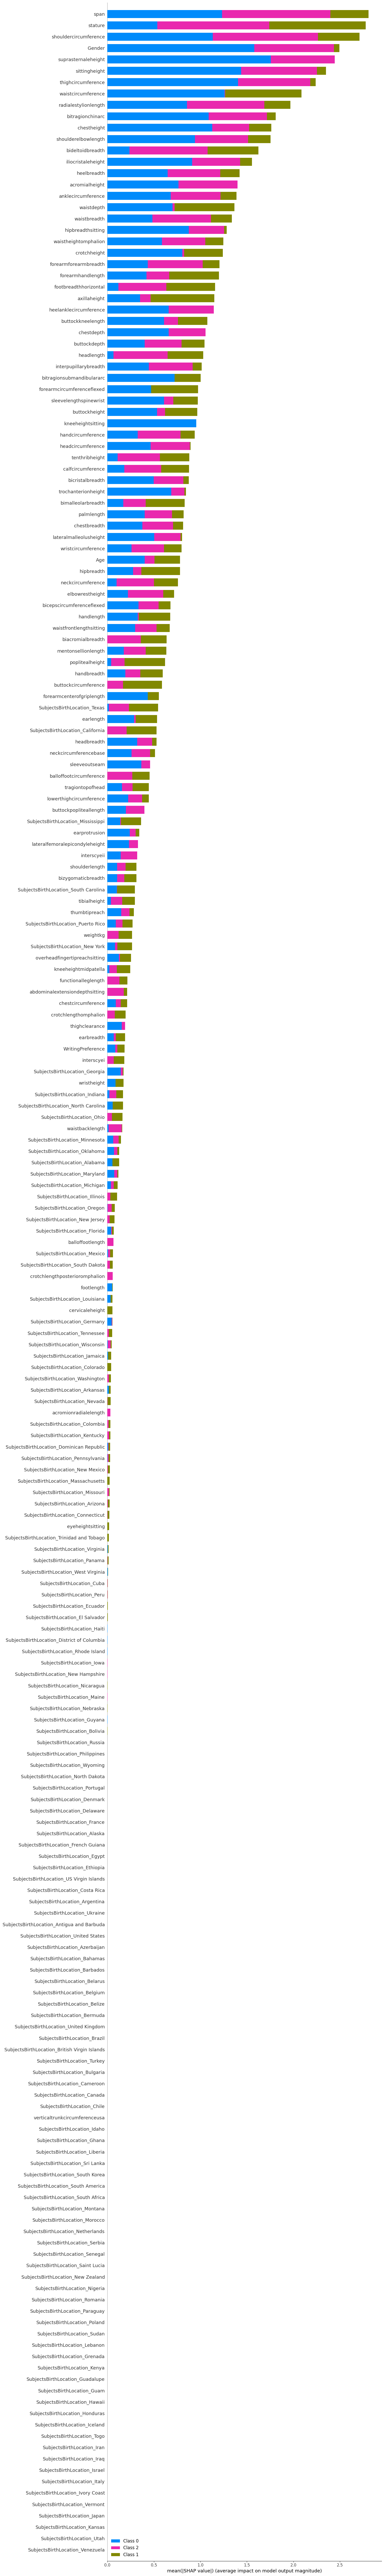

In [ ]:
shap.summary_plot(shap_values, max_display = 500, feature_names = features_shape, plot_size = (15,100) )

In [ ]:
selected_features = [ 'span', 'stature','shouldercircumference', 'waistcircumference',
                       'radialestylionlength','bideltoidbreadth', 'waistdepth',
                      'forearmhandlength', 'footbreadthhorizontal','axillaheight',
                       'buttockkneelength', 'forearmcircumferenceflexed',
                      'sleevelengthspinewrist', 'buttockheight', 'weightkg',
                      'bizygomaticbreadth', 'shoulderlength',  'balloffootcircumference',
                      'earlength',   'forearmcenterofgriplength', 'buttockcircumference',
                      'poplitealheight', 'biacromialbreadth',  'handlength', 'hipbreadth',
                      'Age', 'bimalleolarbreadth', 'headlength', "SubjectsBirthLocation"]

In [ ]:
X_important_features = X[selected_features]
X_important_features.head()

span  stature  shouldercircumference  waistcircumference  \
0  1782     1776                   1151                 933   
1  1745     1702                   1119                 870   
2  1867     1735                   1276                 964   
3  1708     1655                   1155                 857   
4  2035     1914                   1231                 868   

   radialestylionlength  bideltoidbreadth  waistdepth  forearmhandlength  \
0                   273               493         240                477   
1                   254               479         225                476   
2                   268               544         255                491   
3                   249               518         205                467   
4                   302               524         214                550   

   footbreadthhorizontal  axillaheight  buttockkneelength  \
0                    101          1347                619   
1                     98          1293                584   
2                    103          1327                623   
3                    106          1239                560   
4                    111          1478                706   

   forearmcircumferenceflexed  sleevelengthspinewrist  buttockheight  \
0                         299                     883            882   
1                         289                     868            870   
2                         357                     910            901   
3                         318                     848            821   
4                         324                     995           1080   

   weightkg  bizygomaticbreadth  shoulderlength  balloffootcircumference  \
0       815                 142             145                      253   
1       726                 135             141                      245   
2       929                 135             167                      256   
3       794                 143             148                      262   
4       946                 138             180                      267   

   earlength  forearmcenterofgriplength  buttockcircumference  \
0         71                        349                   979   
1         62                        348                   944   
2         61                        355                  1054   
3         66                        352                   991   
4         56                        399                  1029   

   poplitealheight  biacromialbreadth  handlength  hipbreadth  Age  \
0              437                401         193         332   41   
1              417                394         195         312   35   
2              431                427         203         349   42   
3              393                401         194         338   31   
4              523                435         218         332   21   

   bimalleolarbreadth  headlength SubjectsBirthLocation  
0                  71         206          North Dakota  
1                  67         201              New York  
2                  75         202              New York  
3                  73         199             Wisconsin  
4                  80         197        North Carolina

In [ ]:
categoricals_cols2 = X_important_features.select_dtypes("object").columns
categoricals_cols2

Index(['SubjectsBirthLocation'], dtype='object')

In [ ]:
X_important_features.shape

(5769, 29)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X_important_features, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
column_transform_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricals_cols2),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
)

best_model_operations = [
    ("OneHotEncoder", column_transform_shap),
    ("logistic", LogisticRegression(class_weight='balanced', C=1, penalty = 'l1', solver='liblinear', max_iter=50000, random_state=101))]

Best_model_pipeline_shap = Pipeline(steps = best_model_operations)

Best_model_pipeline_shap.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=50000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
eval_metric(Best_model_pipeline_shap, X_train2, y_train2, X_test2, y_test2)

Test_Set---------------------------------------------
[[230   6  24]
 [  5  93  38]
 [ 39  52 667]]
              precision    recall  f1-score   support

       Black       0.84      0.88      0.86       260
    Hispanic       0.62      0.68      0.65       136
       White       0.91      0.88      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.82      0.80      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set--------------------------------------------
[[ 921   23   94]
 [  33  355  155]
 [ 129  187 2718]]
              precision    recall  f1-score   support

       Black       0.85      0.89      0.87      1038
    Hispanic       0.63      0.65      0.64       543
       White       0.92      0.90      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.81      0.81      4615
weighted avg       0.87      0.87      0.87      4615



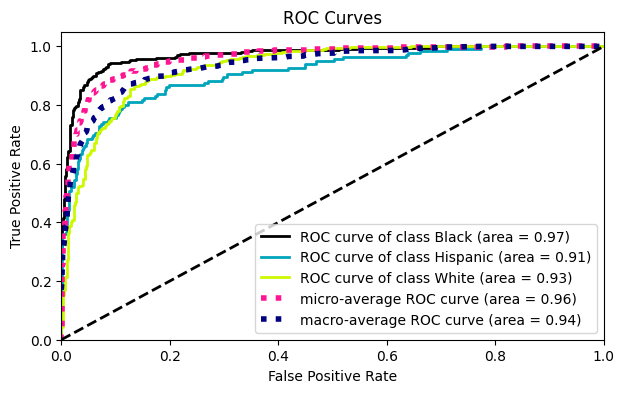

In [ ]:
#ROC and AUC curve
y_pred_proba = Best_model_pipeline_shap.predict_proba(X_test2)

plot_roc(y_test2, y_pred_proba)
plt.show();

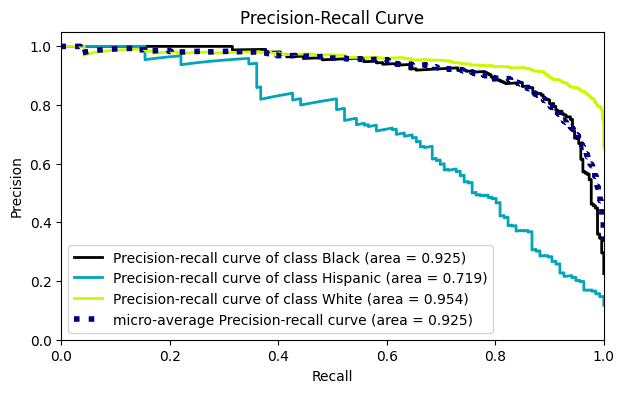

In [ ]:
#PR curve
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

In [ ]:
Best_model_pipeline_shap_CV = Pipeline(steps = best_model_operations)

Best_model_CV_scores = cross_validate (Best_model_pipeline_shap_CV, X_train2 , y_train2, scoring = Hispanic_scoring, cv = 10, n_jobs=-1, return_train_score=True)

Best_model_scores = pd.DataFrame (Best_model_CV_scores, index = range(1,11))
Best_model_scores.mean()[2:]

test_f1_Hispanic           0.612
train_f1_Hispanic          0.645
test_precision_Hispanic    0.608
train_precision_Hispanic   0.633
test_recall_Hispanic       0.617
train_recall_Hispanic      0.656
dtype: float64


**Without Feature Selection**

*   test_f1_Hispanic           0.649
*   train_f1_Hispanic          0.710
*   test_precision_Hispanic    0.656
*   train_precision_Hispanic   0.708
*   test_recall_Hispanic       0.646
*   train_recall_Hispanic      0.712

I noticed that the results without feature selection process is better.

# ___
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___